# This file will evaluate the results from `bilby_pipe` in bulk

## Imports

In [35]:
import numpy as np
import pandas as pd
import bilby
import os
import bilby.gw.result as bilby_result
import ast
import matplotlib.pyplot as plt
import ligo.skymap.plot.pp as ppplot

plt.rcParams.update({

    # --- Figure Layout ---
    "figure.figsize": (6, 4),           # Default figure size in inches
    "figure.dpi": 150,                  # DPI for crisp rendering
    "savefig.dpi": 300,                 # Higher DPI for saved figures
    "figure.autolayout": True,          # Avoids label overlap

    # --- Font & Text ---
    "font.family": "monospace",             # Or "sans-serif" for modern look
    "font.serif": ["Terminal"],  # Matches many journals
    "font.size": 10,                    # Base font size
    "axes.titlesize": 14,               # Title font size
    "axes.labelsize": 10,               # Axis label size
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "mathtext.fontset": "dejavuserif",  # Matches the serif font

    # --- Line & Marker Styles ---
    "lines.linewidth": 1.8,
    "lines.markersize": 6,
    "lines.markeredgewidth": 0.7,

    # --- Axes ---
    "axes.linewidth": 1.0,              # Frame thickness
    "axes.labelpad": 6,                 # Padding between label and axis
    "axes.grid": True,
    "grid.alpha": 0.25,
    "grid.linestyle": "--",
    "grid.linewidth": 0.7,
    "axes.spines.top": False,           # Removes top spine
    "axes.spines.right": False,         # Removes right spine

    # --- Ticks ---
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.top": False,
    "ytick.right": False,

    # --- Legend ---
    "legend.frameon": False,
    "legend.handlelength": 2,
    "legend.handletextpad": 0.4,
    "legend.loc": "best",

    # --- Colors and Colormaps ---
    "image.cmap": "viridis",            # Good perceptually uniform default
    "axes.prop_cycle": plt.cycler("color", [
        "#1f77b4", "#ff7f0e", "#2ca02c",
        "#d62728", "#9467bd", "#8c564b",
        "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
    ]),
})

## Function definitions

In [36]:
def getMeaningfulColumns(differenceDF):
    cols=[]
    for col in differenceDF:
        if differenceDF[col].isna().all():
            continue
        else:
            cols.append(col)
    return cols

def makePostInjDiffPlot(columns,differenceDF,event=False):
    nrows = int(np.ceil((len(columns))/5))
    fig,axs = plt.subplots(nrows,5,figsize=[10,2*nrows])
    if type(event)==str:
        fig.suptitle(f"{event} - Injection value for ensemble")
    else:
        fig.suptitle(f"Posterior samples - Injection for different parameters of event\n{event.label}")
    for col,ax in zip(columns,axs.flatten()):
        ax.hist(differenceDF[col],histtype='step')
        # ax.grid()
        ax.set_xlabel(col)
        ax.axvline(0,0,ax.get_ylim()[1],color='red')
        # if not (type(event)==str):
        #     ax.set_title(f"True: {}")
    for ax in axs[:,0]:
        ax.set_ylabel("Counts / bin")
    fig.tight_layout(pad=2)
    return fig,axs

def getResult(path,injectionDir="injectionFiles",injectionSuffix="_injection.dat",verbose=False):
    """
    A function to read a path where the bilby_pipe run
    is stored, and return a complete CBCResult object
    """
    parentPath = "/".join(path.split("/")[:-1])
    label = path.split("/")[-1] # The label, taking the form UniformParent,uWeight_aligned_BBH_5
    # Return the final result
    readPath = os.path.join(parentPath,label,"final_result",label+"_data0_0_analysis_H1L1V1_result.hdf5")
    if verbose:
        print(f"ReadPath: {readPath}")
    return bilby_result.CBCResult.from_hdf5(readPath)

def getEventsFromPath(path):
    """
    A function to read all CBC events from a parent catalog directory
    """
    print(f"Reading events from {path}")
    allEvents = []
    eventDirectories = os.listdir(path)
    for event in list(eventDirectories):
        try:
            allEvents.append(getResult(os.path.join(path,event)))
        except:
            print(f"Could not open {event}")
            continue
    return allEvents

In [245]:
testingPath = "/pscratch/sd/s/seanmacb/proj411ProdRuns/testing/"

In [246]:
msk = [(x.lower().startswith("testing")) and (not x.__contains__("testing_2")) for x in os.listdir(testingPath)]
testing_directories = np.sort(np.array(os.listdir(testingPath))[np.array(msk)])

In [247]:
testing_directories

array(['testing_0', 'testing_1', 'testing_3', 'testing_4'], dtype='<U20')

09:10 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Reading from directory testing_3
Reading events from /pscratch/sd/s/seanmacb/proj411ProdRuns/testing/testing_3


09:10 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:10 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open allInis.txt


09:10 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:10 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:10 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:10 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,uWeight_aligned_BBH_5


09:10 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:10 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:10 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:10 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open testRun.sh


09:11 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:11 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:11 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:11 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open iniFiles


09:11 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:11 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:11 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:11 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open injectionFiles


09:11 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:11 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Number of events for testing_3: 49


09:11 bilby INFO    : Key: KS-test p-value
09:11 bilby INFO    : mass_ratio: 0.017953387407587118
09:11 bilby INFO    : chirp_mass: 0.8675934639898233
09:11 bilby INFO    : luminosity_distance: 0.8459852864478437
09:11 bilby INFO    : dec: 0.9497864819040553
09:11 bilby INFO    : ra: 0.37896939410090147
09:11 bilby INFO    : chi_1: nan
09:11 bilby INFO    : chi_2: nan
09:11 bilby INFO    : psi: 0.8554867092316484
09:11 bilby INFO    : phase: 0.6956742726851357
09:11 bilby INFO    : theta_jn: 0.5651859071068591
09:11 bilby INFO    : geocent_time: 0.2596923972240942
09:11 bilby INFO    : Combined p-value: nan
09:11 bilby INFO    : Key: KS-test p-value
09:11 bilby INFO    : luminosity_distance: 0.8459852864478437
09:11 bilby INFO    : chirp_mass: 0.8675934639898233
09:11 bilby INFO    : ra: 0.37896939410090147
09:11 bilby INFO    : dec: 0.9497864819040553
09:11 bilby INFO    : mass_ratio: 0.017953387407587118
09:11 bilby INFO    : Combined p-value: 0.3811884012689658


CPU times: user 6.91 s, sys: 317 ms, total: 7.23 s
Wall time: 7.25 s


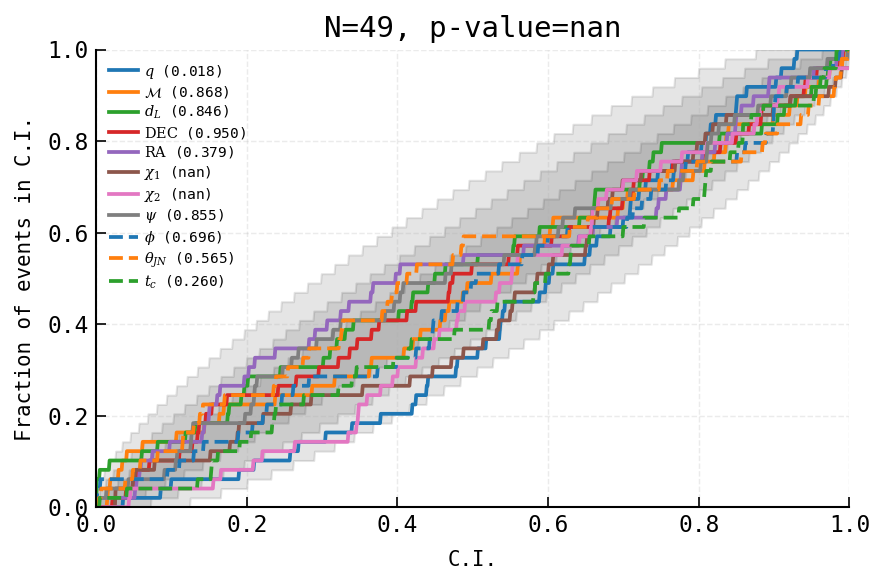

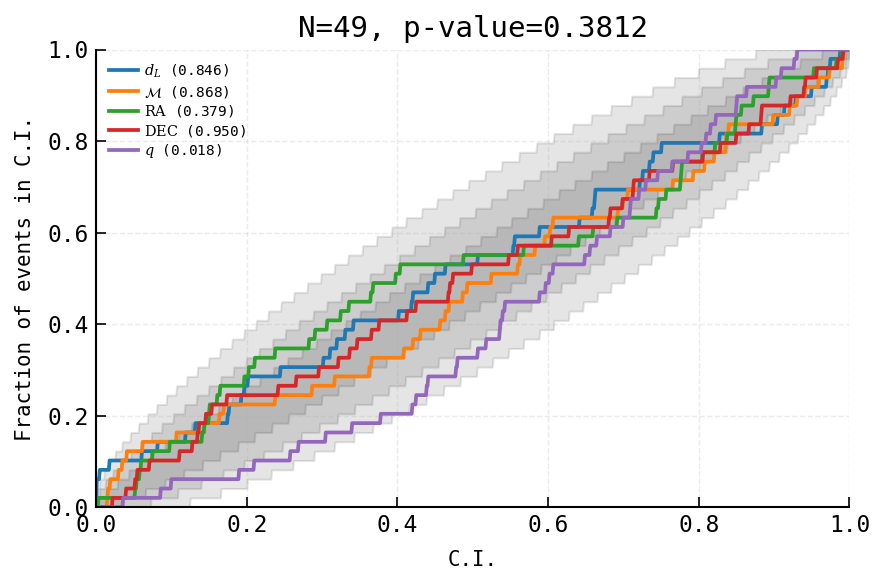

In [18]:
%%time 
for t in [testing_directories[2]]:
    t_directory = os.path.join(testingPath,t)
    print(f"Reading from directory {t}")
    allEvents = getEventsFromPath(t_directory)
    print(f"Number of events for {t}: {len(allEvents)}")
    bilby.core.result.make_pp_plot(allEvents, filename=f"./figures/pp_{t}.png",)
    bilby.core.result.make_pp_plot(allEvents, filename=f"./figures/pp_{t}_inset.png",keys=["luminosity_distance","chirp_mass","ra","dec","mass_ratio"])

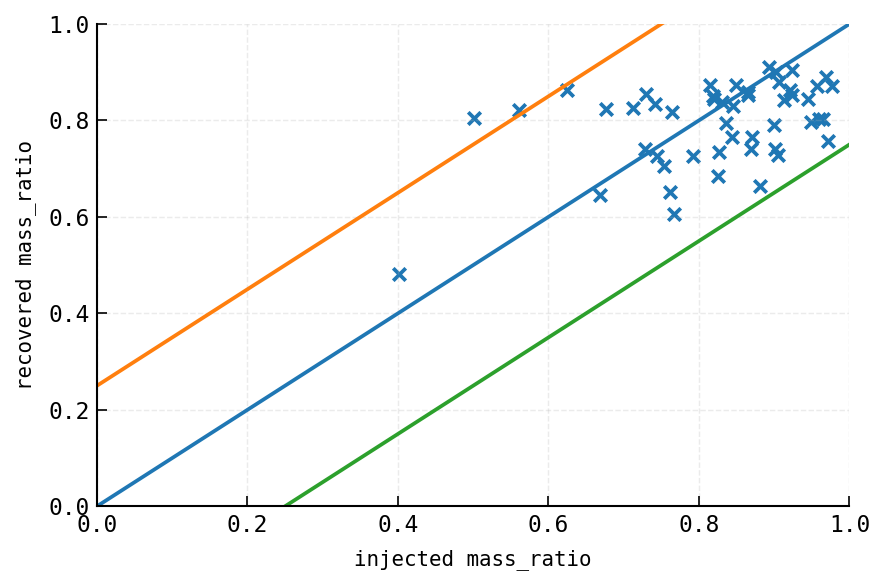

KeyError: 'chi_1'

In [35]:
questionable_params = ["mass_ratio","chi_1"]

for p in questionable_params:
    inj,rec = [],[]
    for ev in allEvents:
        inj.append(ev.injection_parameters[p])
        rec.append(np.median(ev.posterior[p]))
    plt.scatter(inj,rec,marker='x')
    plt.plot([0,1],[0,1])
    plt.plot([0,1],[0.25,1.25])
    plt.plot([0,1],[-0.25,0.75])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel(f"injected {p}")
    plt.ylabel(f"recovered {p}")
    plt.show()

In [28]:
# allEvents[0].posterior["chi_1"]
ev.injection_parameters.keys()

dict_keys(['H1_log_likelihood', 'H1_matched_filter_snr', 'H1_optimal_snr', 'L1_log_likelihood', 'L1_matched_filter_snr', 'L1_optimal_snr', 'V1_log_likelihood', 'V1_matched_filter_snr', 'V1_optimal_snr', 'a_1', 'a_2', 'chi_1_in_plane', 'chi_2_in_plane', 'chi_eff', 'chi_p', 'chirp_mass', 'chirp_mass_source', 'comoving_distance', 'cos_tilt_1', 'cos_tilt_2', 'dec', 'geocent_time', 'iota', 'luminosity_distance', 'mass_1', 'mass_1_source', 'mass_2', 'mass_2_source', 'mass_ratio', 'minimum_frequency', 'phase', 'phi_1', 'phi_12', 'phi_2', 'phi_jl', 'psi', 'ra', 'redshift', 'reference_frequency', 'spin_1x', 'spin_1y', 'spin_1z', 'spin_2x', 'spin_2y', 'spin_2z', 'symmetric_mass_ratio', 'theta_jn', 'tilt_1', 'tilt_2', 'total_mass', 'total_mass_source', 'waveform_approximant'])

## Now, run the same validation test for the catalogs

In [37]:
catalogPath = "/pscratch/sd/s/seanmacb/proj411ProdRuns/catalogs/"

In [38]:
msk = [(x.__contains__("Uniform,")) for x in os.listdir(catalogPath)]
catalog_directories = np.sort(np.array(os.listdir(catalogPath))[np.array(msk)])

In [39]:
catalog_directories

array(['Uniform,StellarMass', 'Uniform,Uniform', 'Uniform,r', 'Uniform,u',
       'Uniform,y'], dtype='<U21')

### `Uniform,Uniform`

In [95]:
myCat = 'Uniform,Uniform'

14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Reading from directory Uniform,Uniform
Reading events from /pscratch/sd/s/seanmacb/proj411ProdRuns/catalogs/Uniform,Uniform


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_52_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_secondPass_100.txt
Could not open UniformParent,UniformWeight_aligned_BBH_48_secondpass
Could not open UniformParent,UniformWeight_aligned_BBH_51_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_16_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_NSBH_3


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_3_secondpass
Could not open UniformParent,UniformWeight_aligned_BBH_50_secondpass
Could not open UniformParent,UniformWeight_aligned_BBH_43_secondpass
Could not open UniformParent,UniformWeight_aligned_BBH_4_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open BBH_secondPass_50_sub.out


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_38_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_15_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_20_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_31_secondpass
Could not open UniformParent,UniformWeight_aligned_BBH_28_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_21_secondpass
Could not open BBH_secondPass.txt


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_NSBH_1
Could not open alignedNSBH_sub.out


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_54_secondpass
Could not open UniformParent,UniformWeight_aligned_BBH_47_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_40_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_25_secondpass
Could not open BBH_secondPass_50.txt
Could not open UniformParent,UniformWeight_aligned_BBH_10_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_precessing_NSBH_2


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_42_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_precessing_NSBH_3


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_0_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_30_secondpass
Could not open UniformParent,UniformWeight_aligned_BBH_27_secondpass
Could not open testRun.sh


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_24_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_14_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open precessing_sub.log


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_41_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open allInis_aligned.txt


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_19_secondpass
Could not open UniformParent,UniformWeight_precessing_NSBH_0


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_13_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_precessing_NSBH_1
Could not open UniformParent,UniformWeight_aligned_BBH_1_secondpass
Could not open UniformParent,UniformWeight_aligned_BBH_22_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_44_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_33_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_NSBH_0


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_37_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_29_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open allInis_precessing.txt


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open alignedNSBH_ini.txt


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_46_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open iniFiles
Could not open UniformParent,UniformWeight_aligned_BBH_35_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_49_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_36_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_45_secondpass
Could not open UniformParent,UniformWeight_aligned_BBH_18_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_NSBH_4


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open aligned_BBH_inis.txt


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_63


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_BBH_23_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_12_secondpass
Could not open UniformParent,UniformWeight_aligned_BBH_53_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_11_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open injectionFiles


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_17_secondpass
Could not open UniformParent,UniformWeight_aligned_BBH_39_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_32_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,UniformWeight_aligned_NSBH_5


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_NSBH_2
Could not open UniformParent,UniformWeight_aligned_BBH_26_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_precessing_BBH_0
Could not open UniformParent,UniformWeight_aligned_BBH_34_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,UniformWeight_aligned_BBH_2_secondpass


14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:43 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Number of events for Uniform,Uniform: 298


14:43 bilby INFO    : Key: KS-test p-value
14:43 bilby INFO    : mass_ratio: 0.0038716480795363893
14:43 bilby INFO    : chirp_mass: 0.1578682406756241
14:43 bilby INFO    : luminosity_distance: 0.05117389388104532
14:43 bilby INFO    : dec: 0.2067309931541189
14:43 bilby INFO    : ra: 0.3886826103782133
14:43 bilby INFO    : chi_1: nan
14:43 bilby INFO    : chi_2: nan
14:43 bilby INFO    : psi: 0.13145555777705142
14:43 bilby INFO    : phase: 0.4692833184336923
14:43 bilby INFO    : theta_jn: 0.6107316343298219
14:43 bilby INFO    : geocent_time: 0.7843399579545337
14:43 bilby INFO    : Combined p-value: nan
14:43 bilby INFO    : Key: KS-test p-value
14:43 bilby INFO    : luminosity_distance: 0.05117389388104532
14:43 bilby INFO    : chirp_mass: 0.1578682406756241
14:43 bilby INFO    : ra: 0.3886826103782133
14:43 bilby INFO    : dec: 0.2067309931541189
14:43 bilby INFO    : mass_ratio: 0.0038716480795363893
14:43 bilby INFO    : Combined p-value: 0.004036242108282093


CPU times: user 50.1 s, sys: 2.96 s, total: 53 s
Wall time: 53.3 s


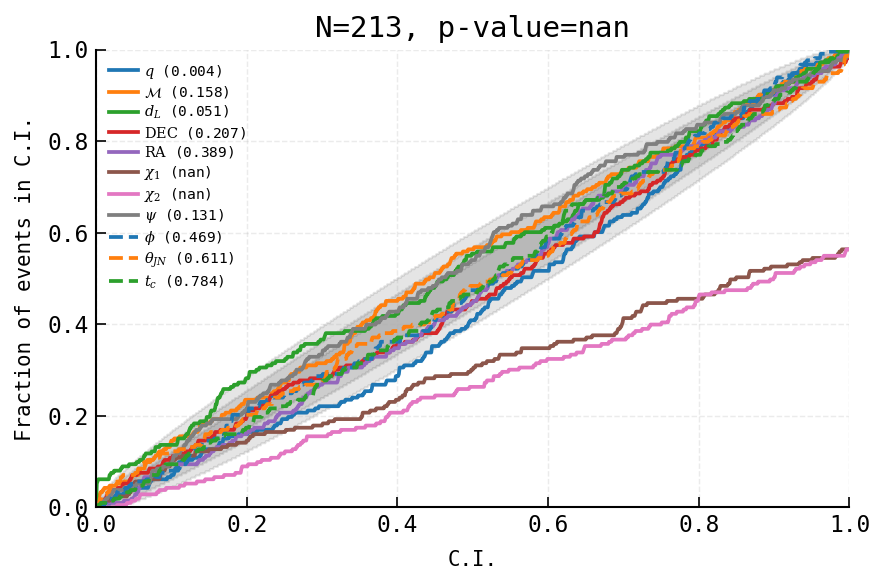

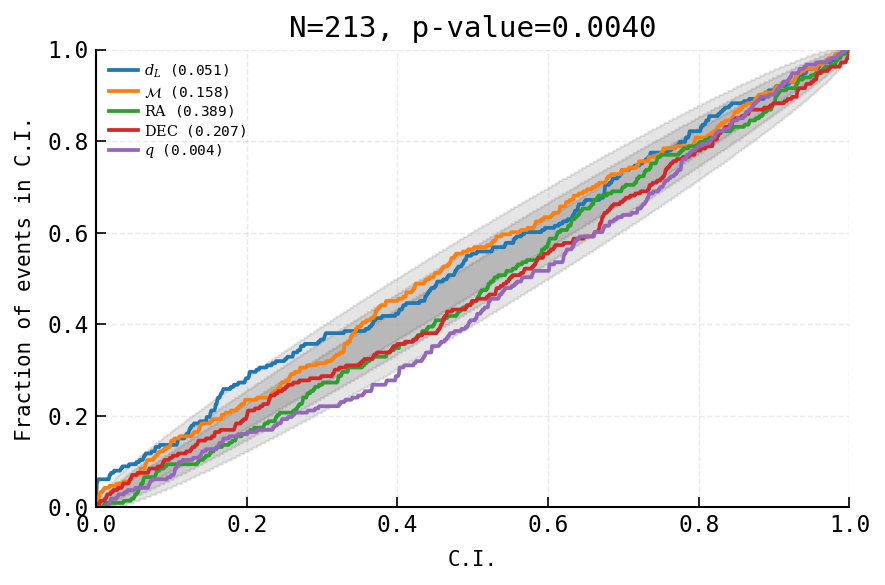

In [96]:
%%time 
for t in [myCat]:
    t_directory = os.path.join(catalogPath,t)
    print(f"Reading from directory {t}")
    allEvents = getEventsFromPath(t_directory)
    print(f"Number of events for {t}: {len(allEvents)}")

    filteredEvents=[]
    for ev in allEvents:
        if np.sqrt(ev.injection_parameters["V1_optimal_snr"]**2 +\
                               ev.injection_parameters["H1_optimal_snr"]**2 +\
                               ev.injection_parameters["L1_optimal_snr"]**2) > 10:
            filteredEvents.append(ev)
            
        
    bilby.core.result.make_pp_plot(filteredEvents, filename=f"./figures/pp_{t}_masked.png",)
    bilby.core.result.make_pp_plot(filteredEvents, filename=f"./figures/pp_{t}_masked_inset.png",keys=["luminosity_distance","chirp_mass","ra","dec","mass_ratio"])

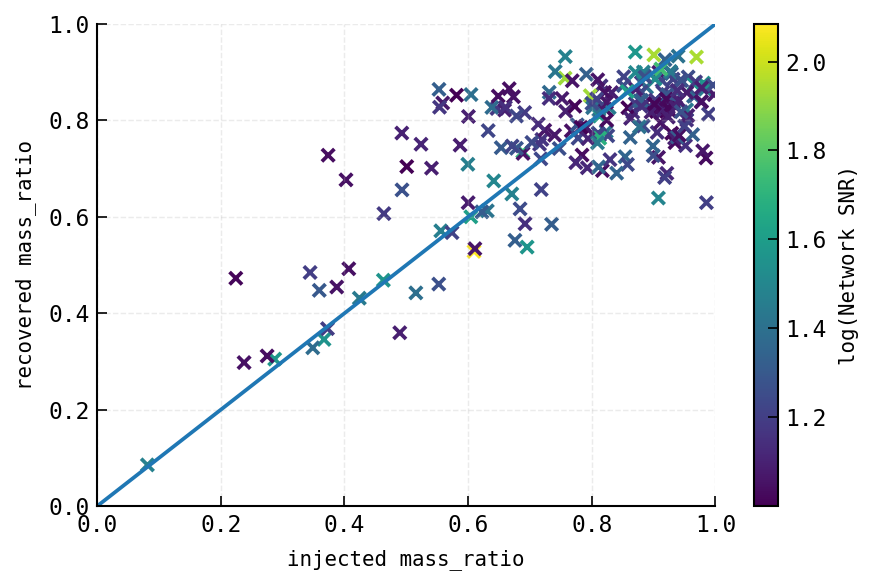

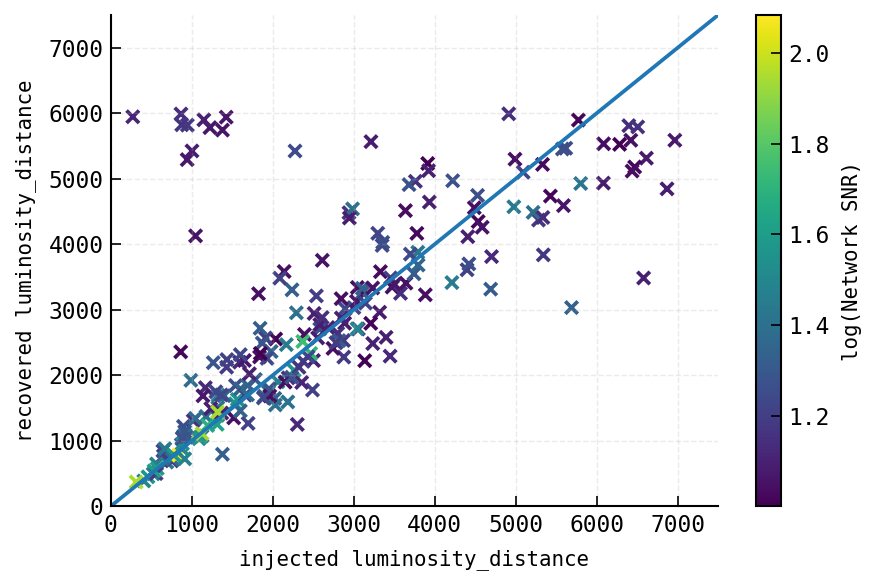

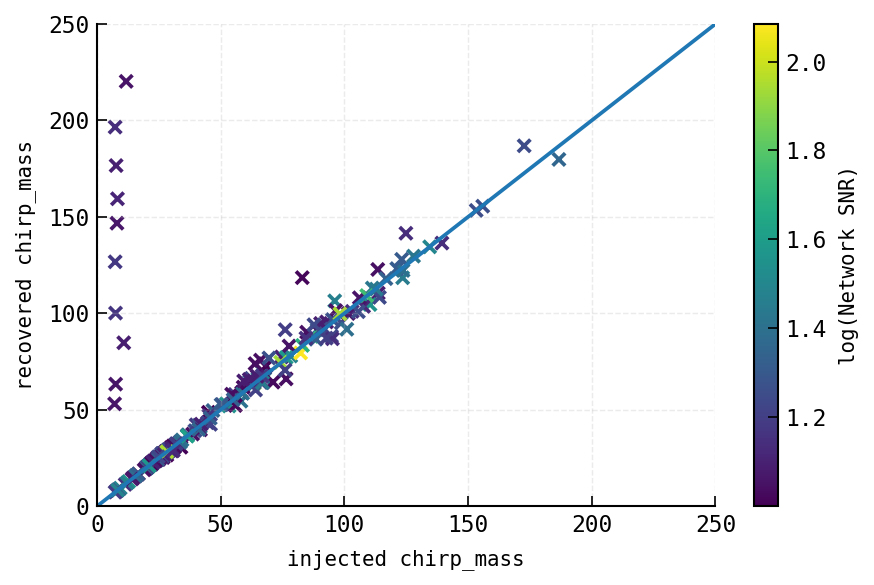

In [97]:
questionable_params = ["mass_ratio","luminosity_distance","chirp_mass"]

for p,upper in zip(questionable_params,[1,7500,250]):
    inj,rec,net_snr,names = [],[],[],[]
    for ev in filteredEvents:
        inj.append(ev.injection_parameters[p])
        rec.append(np.median(ev.posterior[p]))
        net_snr.append(np.sqrt(ev.injection_parameters["V1_optimal_snr"]**2 +\
                               ev.injection_parameters["H1_optimal_snr"]**2 +\
                               ev.injection_parameters["L1_optimal_snr"]**2))
        names.append(ev.label)
    plt.scatter(inj,rec,marker='x',c=np.log10(net_snr))
    plt.colorbar(label='log(Network SNR)')
    plt.plot([0,upper],[0,upper])
    # plt.plot([0,300],[0+150,300+150])
    # plt.plot([0,300],[0-150,300-150])
    plt.xlim(0,upper)
    plt.ylim(0,upper)
    plt.xlabel(f"injected {p}")
    plt.ylabel(f"recovered {p}")
    plt.show()

In [98]:
diffs = np.array(inj)-np.array(rec)
diffs_sorted = np.sort(diffs)
inds = np.argsort(diffs)
finalCutCBCs = []
for diff,snrs,ind in zip(diffs_sorted,net_snr,inds):
    # print(f"{diff/inj[ind]:0.2f}, {snrs:.2f}, {names[ind]}")
    if abs(diff/inj[ind])<2.5:
        finalCutCBCs.append(filteredEvents[ind])
    # print(names[ind])

In [99]:
print(f"Number of CBC's before SNR cut: {len(allEvents)}\n\
Number of CBC's after SNR cut, before convergence cleaning: {len(filteredEvents)}\n\
Number of CBC's after SNR cut and convergence cleaning: {len(finalCutCBCs)}")

Number of CBC's before SNR cut: 298
Number of CBC's after SNR cut, before convergence cleaning: 213
Number of CBC's after SNR cut and convergence cleaning: 203


14:43 bilby INFO    : Key: KS-test p-value
14:43 bilby INFO    : mass_ratio: 0.0074802091769554475
14:43 bilby INFO    : chirp_mass: 0.5654658187019943
14:43 bilby INFO    : luminosity_distance: 0.5006836593649551
14:43 bilby INFO    : dec: 0.21649360833644749
14:43 bilby INFO    : ra: 0.3402560685944189
14:43 bilby INFO    : a_1: 0.12451339564078034
14:43 bilby INFO    : a_2: 0.18596563822938372
14:43 bilby INFO    : psi: 0.23138026884107732
14:43 bilby INFO    : phase: 0.7148663983809085
14:43 bilby INFO    : theta_jn: 0.9659554372726613
14:43 bilby INFO    : phi_12: 1.9432967570842584e-64
14:43 bilby INFO    : phi_jl: 1.9432967570842584e-64
14:43 bilby INFO    : tilt_1: 1.9432967570842584e-64
14:43 bilby INFO    : tilt_2: 1.4716373581238934e-65
14:43 bilby INFO    : geocent_time: 0.6282071105488074
14:43 bilby INFO    : Combined p-value: 3.9741834673560665e-235
14:44 bilby INFO    : Key: KS-test p-value
14:44 bilby INFO    : luminosity_distance: 0.5006836593649551
14:44 bilby INFO  

(<Figure size 900x600 with 1 Axes>,
 pvals(combined_pvalue=np.float64(0.4592433994755619), pvalues=[np.float64(0.5006836593649551), np.float64(0.5654658187019943), np.float64(0.3402560685944189), np.float64(0.21649360833644749)], names=['luminosity_distance', 'chirp_mass', 'ra', 'dec']))

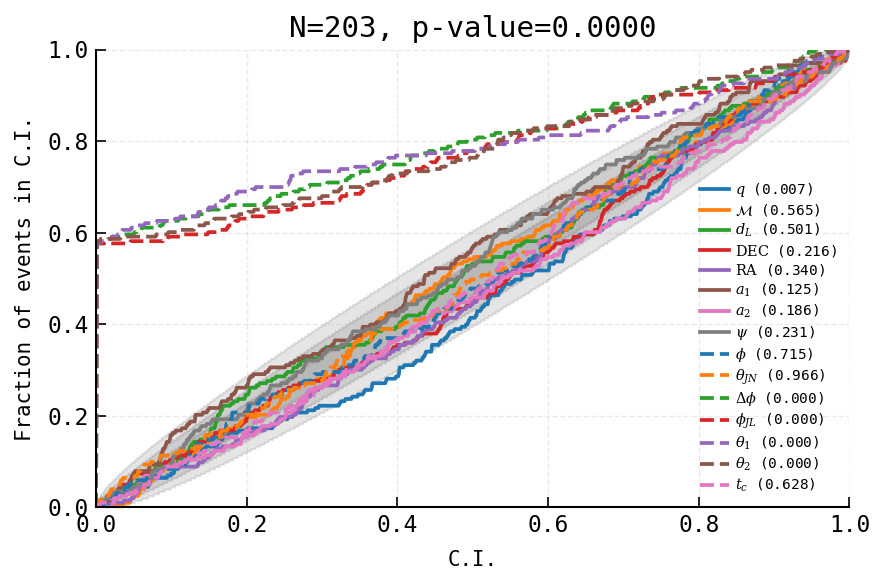

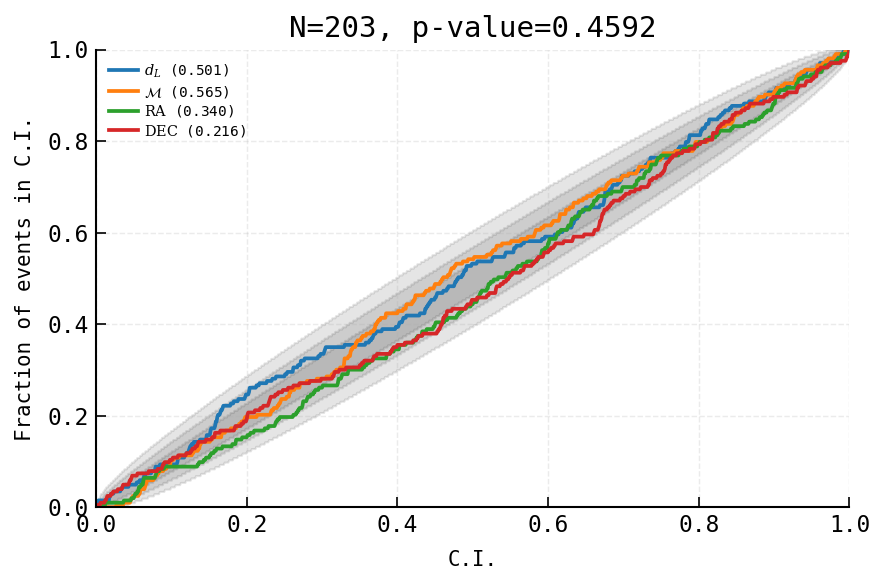

In [100]:
bilby.core.result.make_pp_plot(finalCutCBCs, filename=f"./figures/pp_{t}_finalCut.png",)
bilby.core.result.make_pp_plot(finalCutCBCs, filename=f"./figures/pp_{t}_finalCut_inset.png",keys=["luminosity_distance","chirp_mass","ra","dec"])

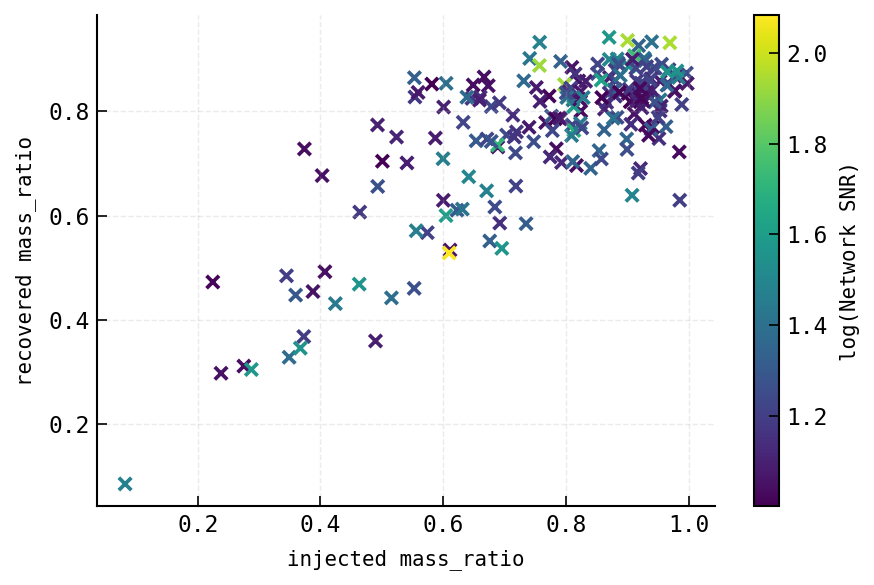

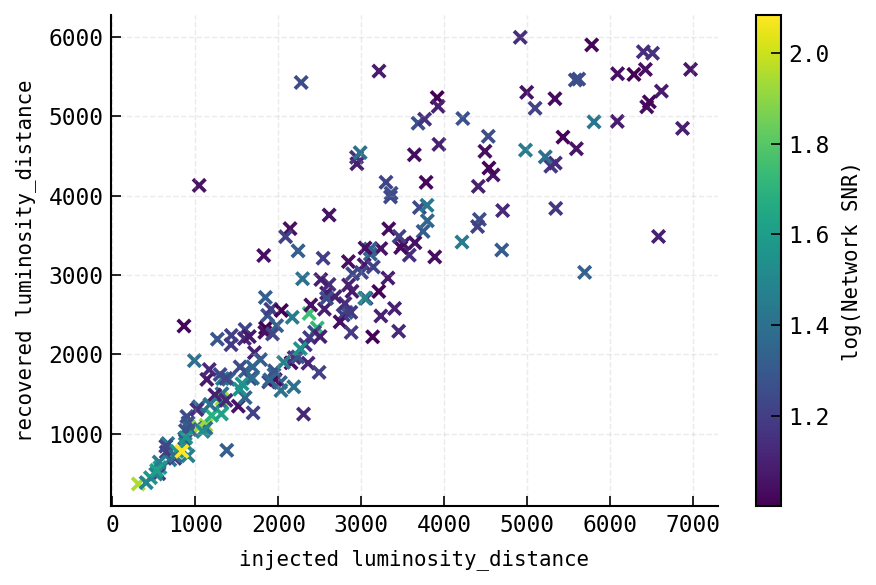

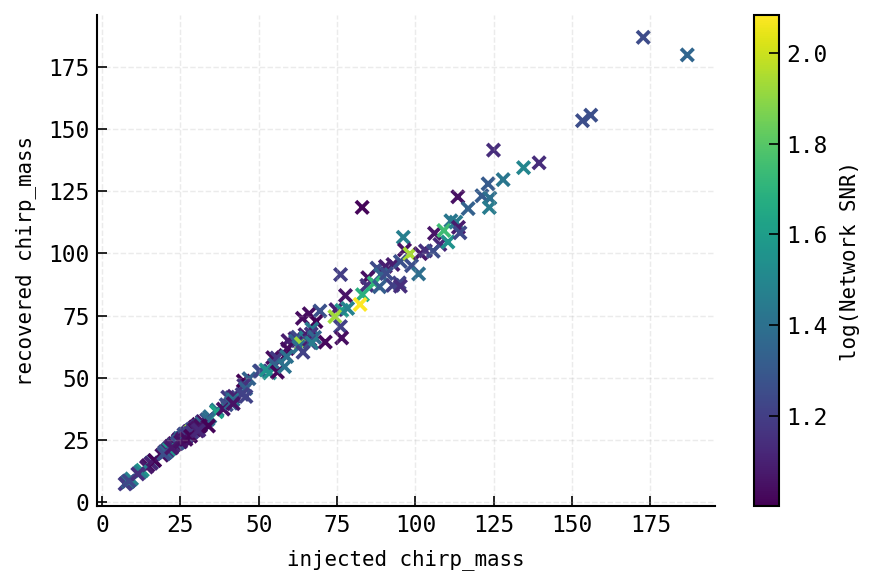

In [101]:
questionable_params = ["mass_ratio","luminosity_distance","chirp_mass"]

for p,upper in zip(questionable_params,[1,7500,250]):
    inj,rec,net_snr,names = [],[],[],[]
    for ev in finalCutCBCs:
        inj.append(ev.injection_parameters[p])
        rec.append(np.median(ev.posterior[p]))
        net_snr.append(np.sqrt(ev.injection_parameters["V1_optimal_snr"]**2 +\
                               ev.injection_parameters["H1_optimal_snr"]**2 +\
                               ev.injection_parameters["L1_optimal_snr"]**2))
        names.append(ev.label)
    plt.scatter(inj,rec,marker='x',c=np.log10(net_snr))
    plt.colorbar(label='log(Network SNR)')
    # plt.plot([0,upper],[0,upper])
    # plt.plot([0,300],[0+150,300+150])
    # plt.plot([0,300],[0-150,300-150])
    # plt.xlim(0,upper)
    # plt.ylim(0,upper)
    plt.xlabel(f"injected {p}")
    plt.ylabel(f"recovered {p}")
    plt.show()

### `Uniform,StellarMass`

In [88]:
myCat = 'Uniform,StellarMass'

14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Reading from directory Uniform,StellarMass
Reading events from /pscratch/sd/s/seanmacb/proj411ProdRuns/catalogs/Uniform,StellarMass


14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_secondPass.txt


14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,StellarMassWeight_aligned_NSBH_0


14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open top40AlignedBBHs_1.txt
Could not open top40AlignedBBHs_0.txt


14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open fourAlignedBBHs.txt


14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open testRun.sh


14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open alignedBBHs.txt


14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,StellarMassWeight_aligned_BBH_159


14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open top50AlignedBBHs.txt


14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open iniFiles


14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,StellarMassWeight_precessing_BBH_53


14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open precessingBBHs.txt


14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open injectionFiles


14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:42 bilby INFO    : Global meta data was removed from the result object for compatibility

Number of events for Uniform,StellarMass: 298


14:42 bilby INFO    : Key: KS-test p-value
14:42 bilby INFO    : mass_ratio: 0.15347101676851038
14:42 bilby INFO    : chirp_mass: 0.1549346553294635
14:42 bilby INFO    : luminosity_distance: 0.1020535450672303
14:42 bilby INFO    : dec: 0.028259280078659077
14:42 bilby INFO    : ra: 0.5790738844986661
14:42 bilby INFO    : chi_1: nan
14:42 bilby INFO    : chi_2: nan
14:42 bilby INFO    : psi: 0.645453499160709
14:42 bilby INFO    : phase: 0.7386873825211335
14:42 bilby INFO    : theta_jn: 0.46636978933580664
14:42 bilby INFO    : geocent_time: 0.10222076540582414
14:42 bilby INFO    : Combined p-value: nan
14:42 bilby INFO    : Key: KS-test p-value
14:42 bilby INFO    : luminosity_distance: 0.1020535450672303
14:42 bilby INFO    : chirp_mass: 0.1549346553294635
14:42 bilby INFO    : ra: 0.5790738844986661
14:42 bilby INFO    : dec: 0.028259280078659077
14:42 bilby INFO    : mass_ratio: 0.15347101676851038
14:42 bilby INFO    : Combined p-value: 0.02681890812490072


CPU times: user 46 s, sys: 2.35 s, total: 48.3 s
Wall time: 48.5 s


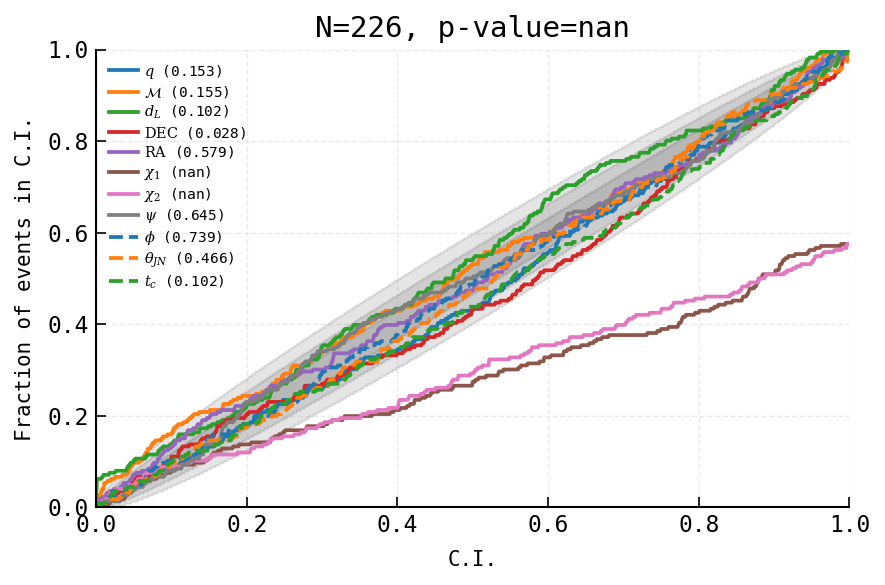

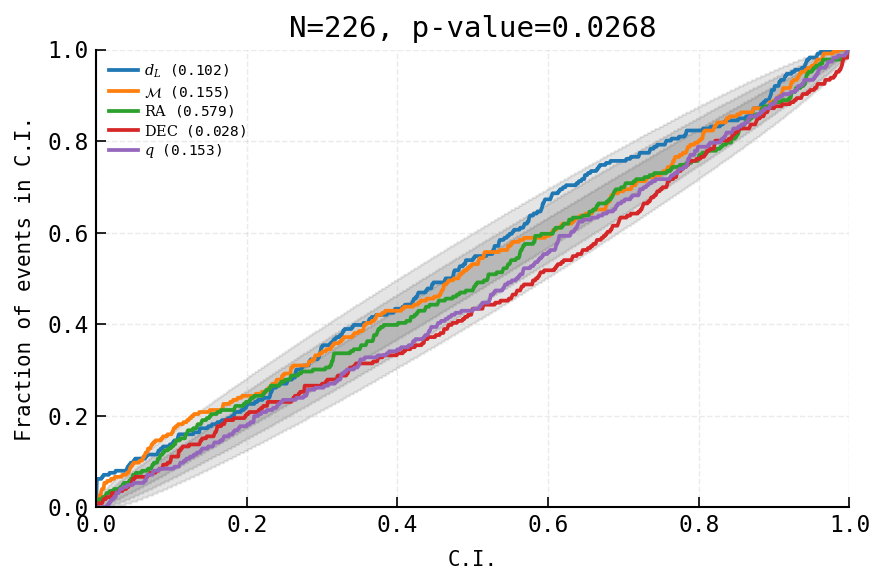

In [89]:
%%time 
for t in [myCat]:
    t_directory = os.path.join(catalogPath,t)
    print(f"Reading from directory {t}")
    allEvents = getEventsFromPath(t_directory)
    print(f"Number of events for {t}: {len(allEvents)}")

    filteredEvents=[]
    for ev in allEvents:
        if np.sqrt(ev.injection_parameters["V1_optimal_snr"]**2 +\
                               ev.injection_parameters["H1_optimal_snr"]**2 +\
                               ev.injection_parameters["L1_optimal_snr"]**2) > 10:
            filteredEvents.append(ev)
            
        
    bilby.core.result.make_pp_plot(filteredEvents, filename=f"./figures/pp_{t}_masked.png",)
    bilby.core.result.make_pp_plot(filteredEvents, filename=f"./figures/pp_{t}_masked_inset.png",keys=["luminosity_distance","chirp_mass","ra","dec","mass_ratio"])

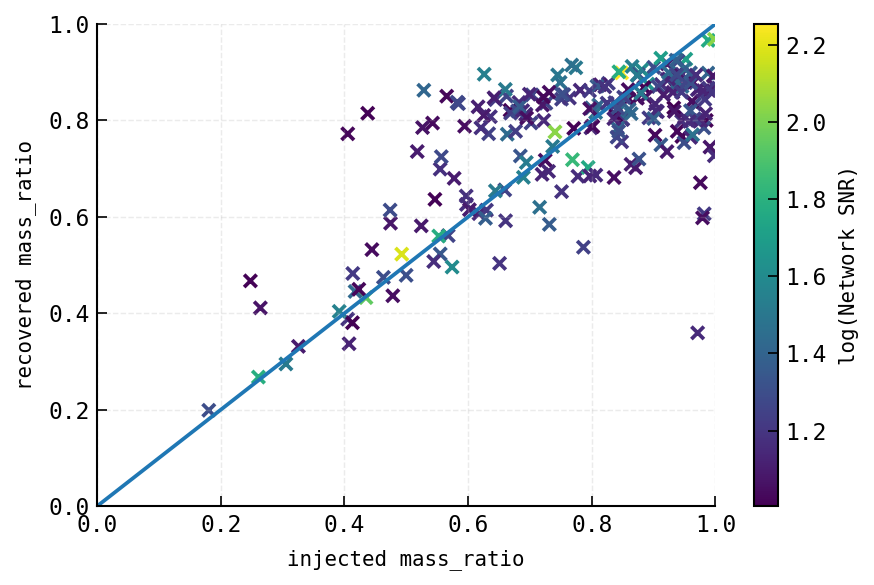

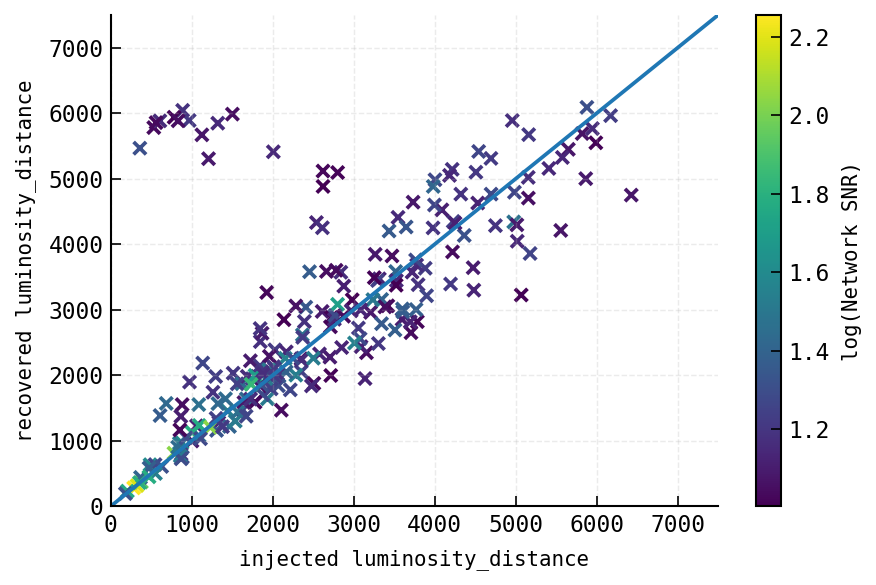

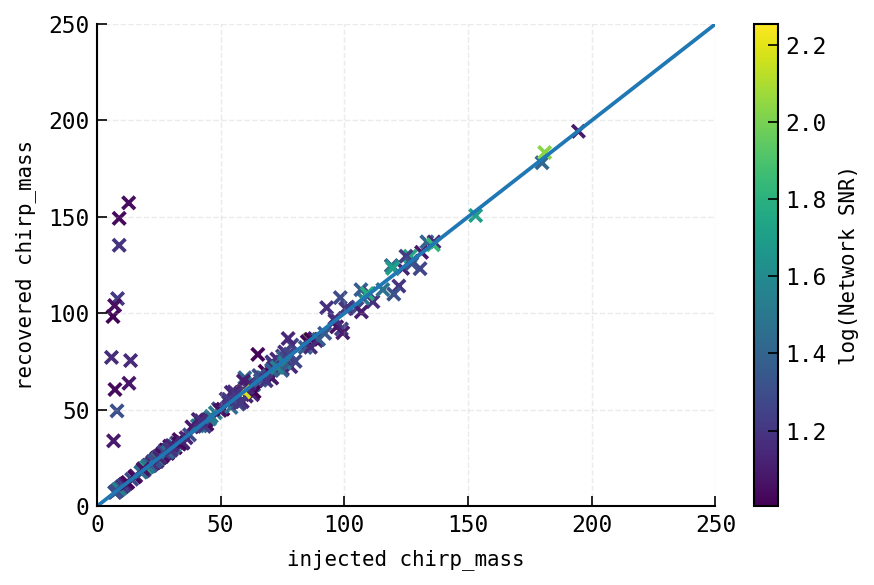

In [90]:
questionable_params = ["mass_ratio","luminosity_distance","chirp_mass"]

for p,upper in zip(questionable_params,[1,7500,250]):
    inj,rec,net_snr,names = [],[],[],[]
    for ev in filteredEvents:
        inj.append(ev.injection_parameters[p])
        rec.append(np.median(ev.posterior[p]))
        net_snr.append(np.sqrt(ev.injection_parameters["V1_optimal_snr"]**2 +\
                               ev.injection_parameters["H1_optimal_snr"]**2 +\
                               ev.injection_parameters["L1_optimal_snr"]**2))
        names.append(ev.label)
    plt.scatter(inj,rec,marker='x',c=np.log10(net_snr))
    plt.colorbar(label='log(Network SNR)')
    plt.plot([0,upper],[0,upper])
    # plt.plot([0,300],[0+150,300+150])
    # plt.plot([0,300],[0-150,300-150])
    plt.xlim(0,upper)
    plt.ylim(0,upper)
    plt.xlabel(f"injected {p}")
    plt.ylabel(f"recovered {p}")
    plt.show()

In [91]:
diffs = np.array(inj)-np.array(rec)
diffs_sorted = np.sort(diffs)
inds = np.argsort(diffs)
finalCutCBCs = []
for diff,snrs,ind in zip(diffs_sorted,net_snr,inds):
    # print(f"{diff/inj[ind]:0.2f}, {snrs:.2f}, {names[ind]}")
    if abs(diff/inj[ind])<2.5:
        finalCutCBCs.append(filteredEvents[ind])
    # print(names[ind])

In [92]:
print(f"Number of CBC's before SNR cut: {len(allEvents)}\n\
Number of CBC's after SNR cut, before convergence cleaning: {len(filteredEvents)}\n\
Number of CBC's after SNR cut and convergence cleaning: {len(finalCutCBCs)}")

Number of CBC's before SNR cut: 298
Number of CBC's after SNR cut, before convergence cleaning: 226
Number of CBC's after SNR cut and convergence cleaning: 214


14:42 bilby INFO    : Key: KS-test p-value
14:42 bilby INFO    : mass_ratio: 0.4155852292349428
14:42 bilby INFO    : chirp_mass: 0.7466845570411953
14:42 bilby INFO    : luminosity_distance: 0.3020546951837454
14:42 bilby INFO    : dec: 0.012118519513955317
14:42 bilby INFO    : ra: 0.5627502870378399
14:42 bilby INFO    : a_1: 0.21004601855523408
14:42 bilby INFO    : a_2: 0.8211076447768969
14:42 bilby INFO    : psi: 0.3870873636279031
14:42 bilby INFO    : phase: 0.5840418362632327
14:42 bilby INFO    : theta_jn: 0.4819824079783528
14:42 bilby INFO    : phi_12: 3.6568405557211656e-71
14:42 bilby INFO    : phi_jl: 3.6568405557211656e-71
14:42 bilby INFO    : tilt_1: 1.855537165942138e-71
14:42 bilby INFO    : tilt_2: 3.818127075104526e-72
14:42 bilby INFO    : geocent_time: 0.16755239708912129
14:42 bilby INFO    : Combined p-value: 7.359346043722476e-261
14:42 bilby INFO    : Key: KS-test p-value
14:42 bilby INFO    : luminosity_distance: 0.3020546951837454
14:42 bilby INFO    : ch

(<Figure size 900x600 with 1 Axes>,
 pvals(combined_pvalue=np.float64(0.11342826722801477), pvalues=[np.float64(0.3020546951837454), np.float64(0.7466845570411953), np.float64(0.5627502870378399), np.float64(0.012118519513955317)], names=['luminosity_distance', 'chirp_mass', 'ra', 'dec']))

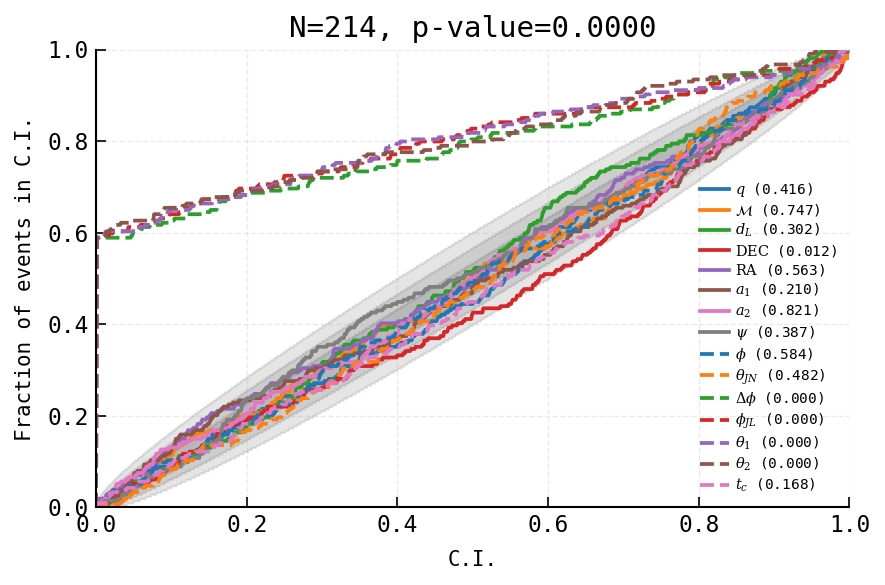

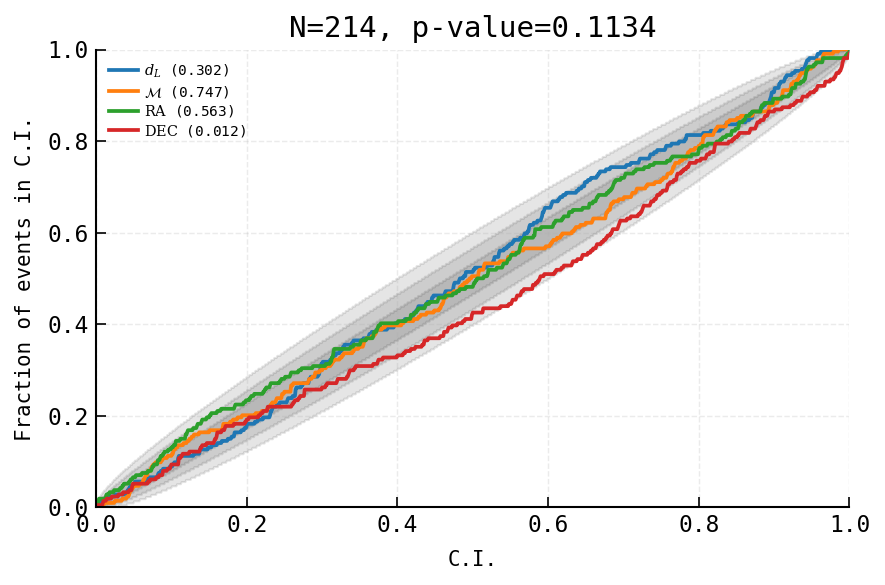

In [93]:
bilby.core.result.make_pp_plot(finalCutCBCs, filename=f"./figures/pp_{t}_finalCut.png",)
bilby.core.result.make_pp_plot(finalCutCBCs, filename=f"./figures/pp_{t}_finalCut_inset.png",keys=["luminosity_distance","chirp_mass","ra","dec"])

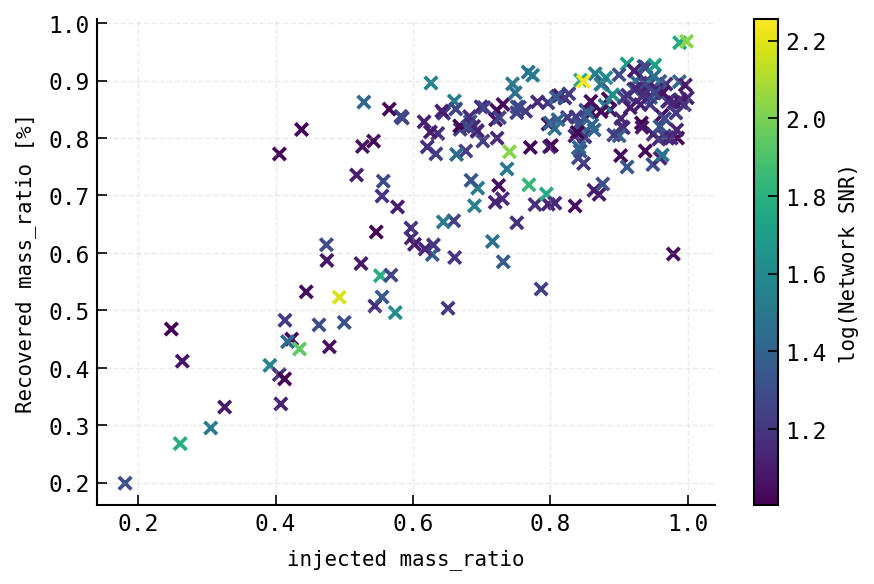

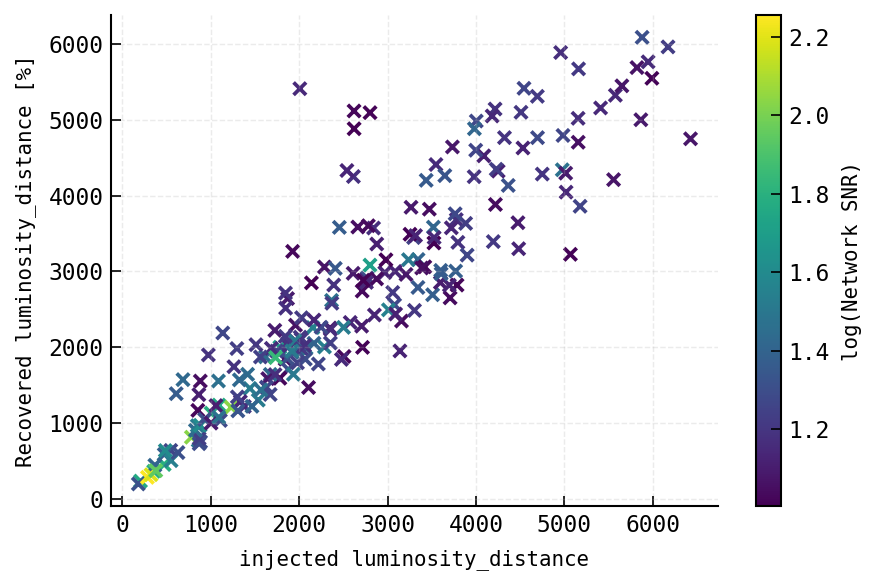

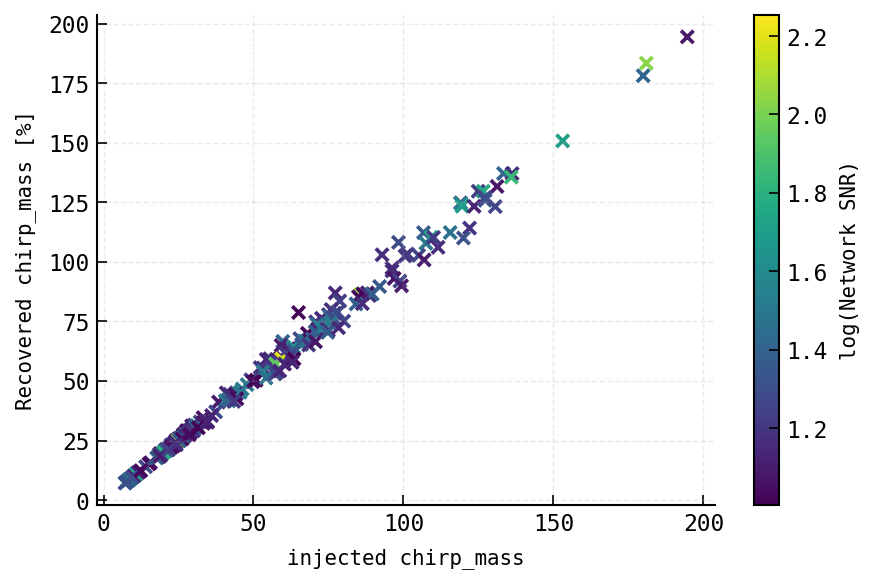

In [94]:
questionable_params = ["mass_ratio","luminosity_distance","chirp_mass"]

for p,upper in zip(questionable_params,[1,7500,250]):
    inj,rec,net_snr,names = [],[],[],[]
    for ev in finalCutCBCs:
        inj.append(ev.injection_parameters[p])
        rec.append(np.median(ev.posterior[p]))
        net_snr.append(np.sqrt(ev.injection_parameters["V1_optimal_snr"]**2 +\
                               ev.injection_parameters["H1_optimal_snr"]**2 +\
                               ev.injection_parameters["L1_optimal_snr"]**2))
        names.append(ev.label)
    plt.scatter(inj,rec,marker='x',c=np.log10(net_snr))
    plt.colorbar(label='log(Network SNR)')
    # plt.plot([0,upper],[0,upper])
    # plt.plot([0,300],[0+150,300+150])
    # plt.plot([0,300],[0-150,300-150])
    # plt.xlim(0,upper)
    # plt.ylim(0,upper)
    plt.xlabel(f"injected {p}")
    plt.ylabel(f"Recovered {p} [%]")
    plt.show()

### `Uniform,uWeight`

In [82]:
myCat = 'Uniform,u'

14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Reading from directory Uniform,u
Reading events from /pscratch/sd/s/seanmacb/proj411ProdRuns/catalogs/Uniform,u
Could not open BBH_300.txt


14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_50_sub.out


14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_300_sub.out


14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_100_sub.out


14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_secondPass.txt


14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_250.txt


14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_50.txt


14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open testRun.sh


14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_100.txt


14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open allBBHs.txt


14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open iniFiles


14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open BBH_200.txt


14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_250_sub.out


14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open injectionFiles


14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_150_sub.out


14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:41 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_150.txt
Could not open BBH_200_sub.out
Number of events for Uniform,u: 300


14:41 bilby INFO    : Key: KS-test p-value
14:41 bilby INFO    : mass_ratio: 0.06445877725333915
14:41 bilby INFO    : chirp_mass: 0.5247268517098851
14:41 bilby INFO    : luminosity_distance: 0.016266125304913514
14:41 bilby INFO    : dec: 0.5704084886183669
14:41 bilby INFO    : ra: 0.721343978445791
14:41 bilby INFO    : chi_1: nan
14:41 bilby INFO    : chi_2: nan
14:41 bilby INFO    : psi: 0.5573851213502947
14:41 bilby INFO    : phase: 0.5025106717713412
14:41 bilby INFO    : theta_jn: 0.09254776674967347
14:41 bilby INFO    : geocent_time: 0.833139294427275
14:41 bilby INFO    : Combined p-value: nan
14:41 bilby INFO    : Key: KS-test p-value
14:41 bilby INFO    : luminosity_distance: 0.016266125304913514
14:41 bilby INFO    : chirp_mass: 0.5247268517098851
14:41 bilby INFO    : ra: 0.721343978445791
14:41 bilby INFO    : dec: 0.5704084886183669
14:41 bilby INFO    : mass_ratio: 0.06445877725333915
14:41 bilby INFO    : Combined p-value: 0.07922048135737374


CPU times: user 47.6 s, sys: 2.44 s, total: 50.1 s
Wall time: 50.2 s


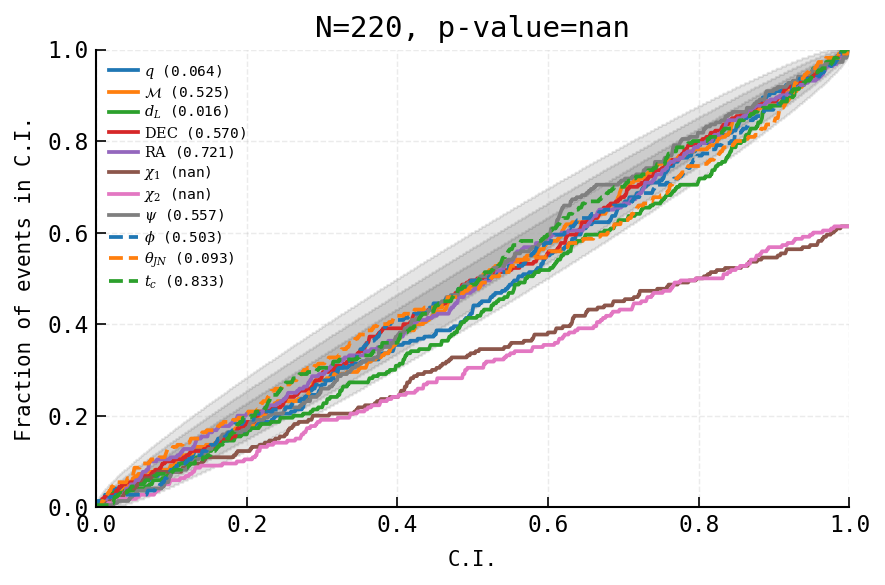

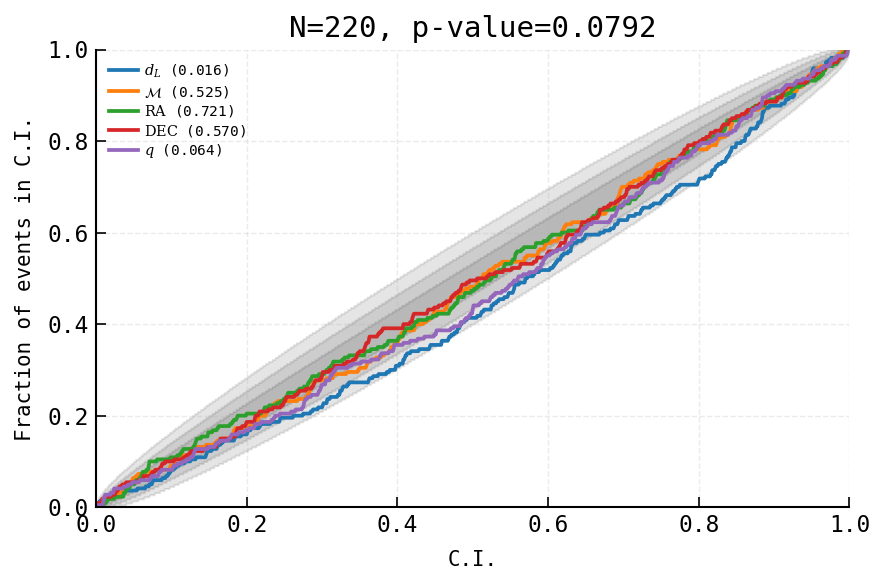

In [83]:
%%time 
for t in [myCat]:
    t_directory = os.path.join(catalogPath,t)
    print(f"Reading from directory {t}")
    allEvents = getEventsFromPath(t_directory)
    print(f"Number of events for {t}: {len(allEvents)}")

    filteredEvents=[]
    for ev in allEvents:
        if np.sqrt(ev.injection_parameters["V1_optimal_snr"]**2 +\
                               ev.injection_parameters["H1_optimal_snr"]**2 +\
                               ev.injection_parameters["L1_optimal_snr"]**2) > 10:
            filteredEvents.append(ev)
            
        
    bilby.core.result.make_pp_plot(filteredEvents, filename=f"./figures/pp_{t}_masked.png",)
    bilby.core.result.make_pp_plot(filteredEvents, filename=f"./figures/pp_{t}_masked_inset.png",keys=["luminosity_distance","chirp_mass","ra","dec","mass_ratio"])

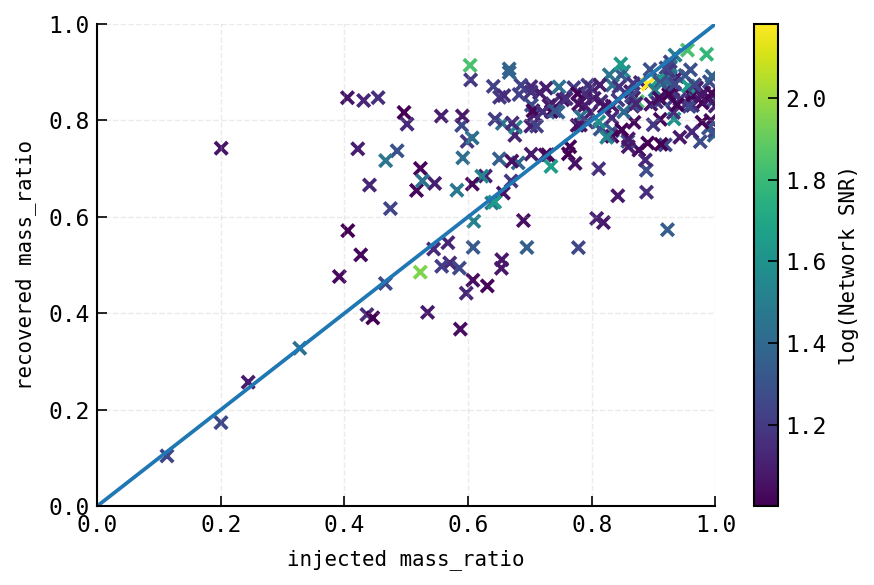

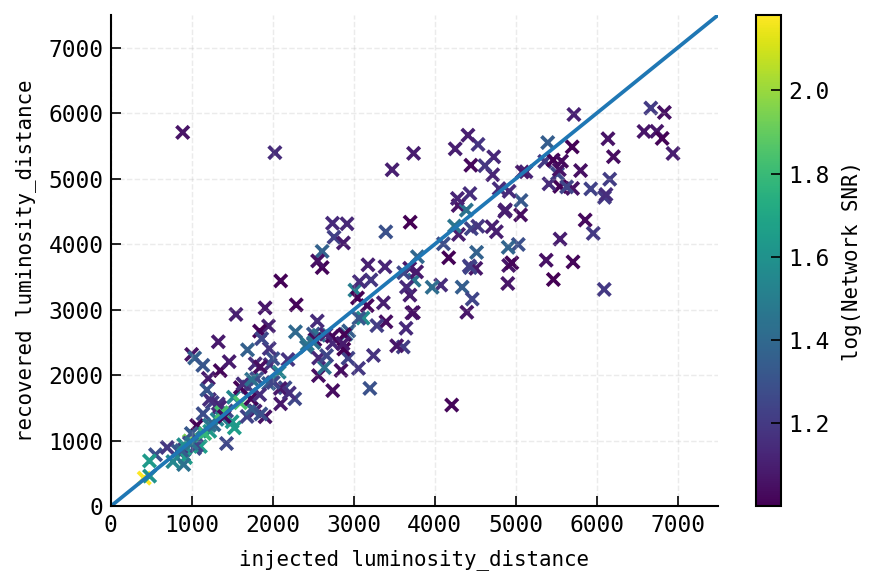

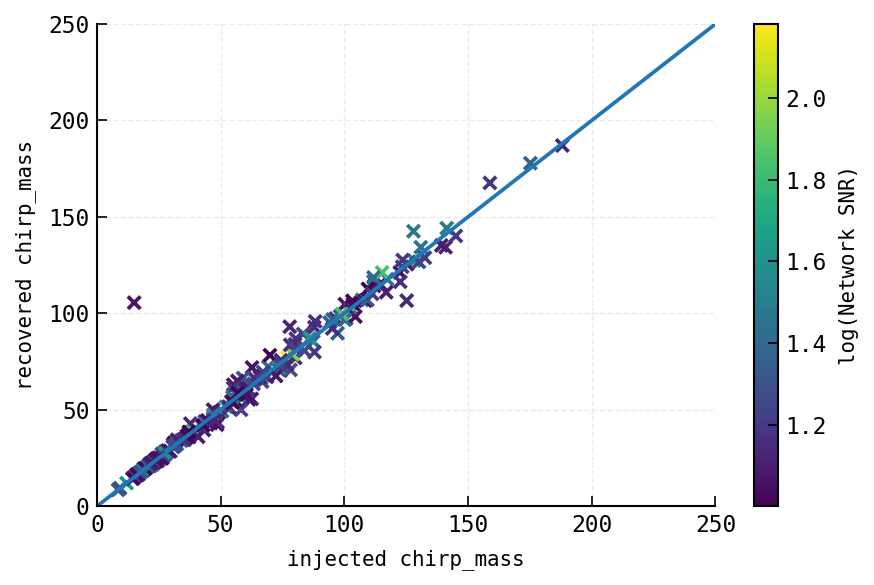

In [84]:
questionable_params = ["mass_ratio","luminosity_distance","chirp_mass"]

for p,upper in zip(questionable_params,[1,7500,250]):
    inj,rec,net_snr,names = [],[],[],[]
    for ev in filteredEvents:
        inj.append(ev.injection_parameters[p])
        rec.append(np.median(ev.posterior[p]))
        net_snr.append(np.sqrt(ev.injection_parameters["V1_optimal_snr"]**2 +\
                               ev.injection_parameters["H1_optimal_snr"]**2 +\
                               ev.injection_parameters["L1_optimal_snr"]**2))
        names.append(ev.label)
    plt.scatter(inj,rec,marker='x',c=np.log10(net_snr))
    plt.colorbar(label='log(Network SNR)')
    plt.plot([0,upper],[0,upper])
    # plt.plot([0,300],[0+150,300+150])
    # plt.plot([0,300],[0-150,300-150])
    plt.xlim(0,upper)
    plt.ylim(0,upper)
    plt.xlabel(f"injected {p}")
    plt.ylabel(f"recovered {p}")
    plt.show()

In [85]:
diffs = np.array(inj)-np.array(rec)
diffs_sorted = np.sort(diffs)
inds = np.argsort(diffs)
finalCutCBCs = []
for diff,snrs,ind in zip(diffs_sorted,net_snr,inds):
    # print(f"{diff/inj[ind]:0.2f}, {snrs:.2f}, {names[ind]}")
    if abs(diff/inj[ind])<2.5:
        finalCutCBCs.append(filteredEvents[ind])
    # print(names[ind])

In [86]:
print(f"Number of CBC's before SNR cut: {len(allEvents)}\n\
Number of CBC's after SNR cut, before convergence cleaning: {len(filteredEvents)}\n\
Number of CBC's after SNR cut and convergence cleaning: {len(finalCutCBCs)}")

Number of CBC's before SNR cut: 300
Number of CBC's after SNR cut, before convergence cleaning: 220
Number of CBC's after SNR cut and convergence cleaning: 219


14:42 bilby INFO    : Key: KS-test p-value
14:42 bilby INFO    : mass_ratio: 0.052663170382124314
14:42 bilby INFO    : chirp_mass: 0.45436842811909783
14:42 bilby INFO    : luminosity_distance: 0.012628417612492525
14:42 bilby INFO    : dec: 0.5246376083652519
14:42 bilby INFO    : ra: 0.7703555678070488
14:42 bilby INFO    : chi_1: nan
14:42 bilby INFO    : chi_2: nan
14:42 bilby INFO    : psi: 0.5846620015632807
14:42 bilby INFO    : phase: 0.47569399582219785
14:42 bilby INFO    : theta_jn: 0.08181727721976606
14:42 bilby INFO    : geocent_time: 0.8446845556671218
14:42 bilby INFO    : Combined p-value: nan
14:42 bilby INFO    : Key: KS-test p-value
14:42 bilby INFO    : luminosity_distance: 0.012628417612492525
14:42 bilby INFO    : chirp_mass: 0.45436842811909783
14:42 bilby INFO    : ra: 0.7703555678070488
14:42 bilby INFO    : dec: 0.5246376083652519
14:42 bilby INFO    : Combined p-value: 0.14535877229416944


(<Figure size 900x600 with 1 Axes>,
 pvals(combined_pvalue=np.float64(0.14535877229416944), pvalues=[np.float64(0.012628417612492525), np.float64(0.45436842811909783), np.float64(0.7703555678070488), np.float64(0.5246376083652519)], names=['luminosity_distance', 'chirp_mass', 'ra', 'dec']))

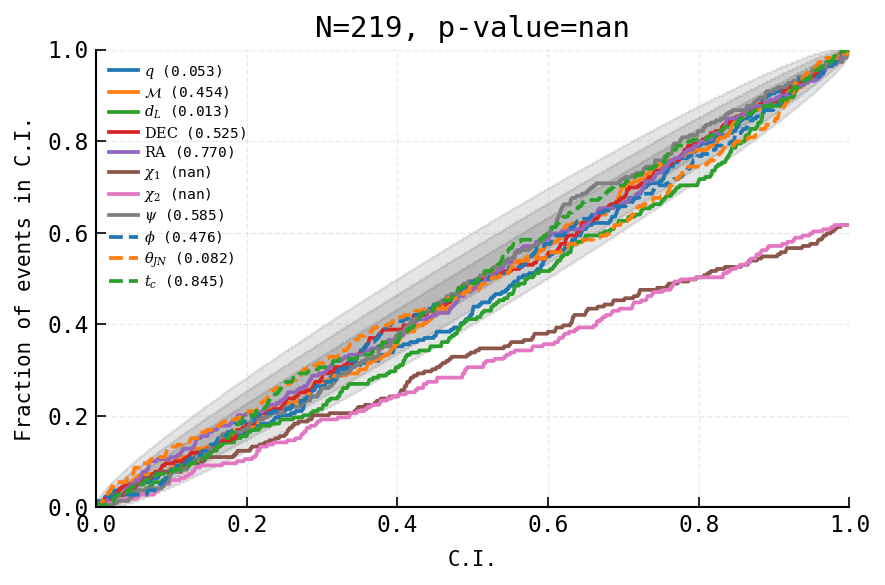

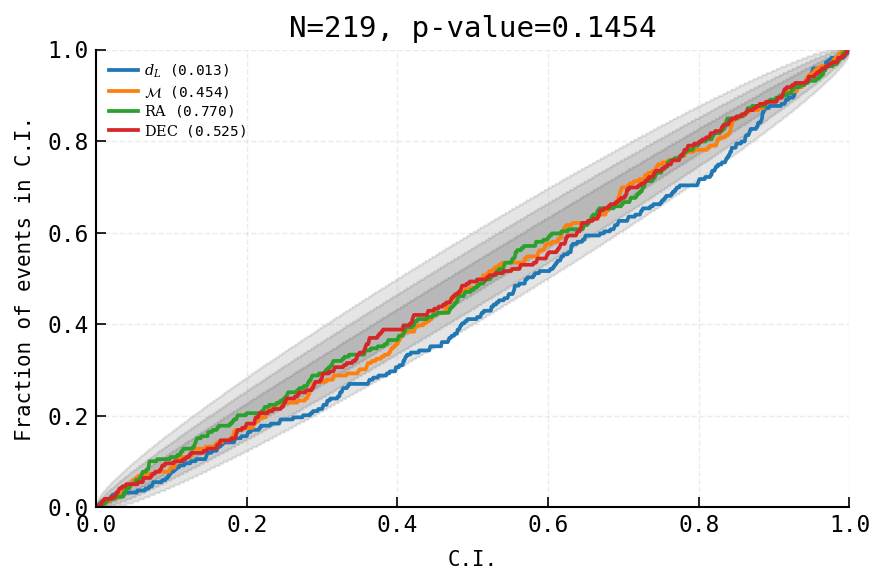

In [87]:
bilby.core.result.make_pp_plot(finalCutCBCs, filename=f"./figures/pp_{t}_finalCut.png",)
bilby.core.result.make_pp_plot(finalCutCBCs, filename=f"./figures/pp_{t}_finalCut_inset.png",keys=["luminosity_distance","chirp_mass","ra","dec"])

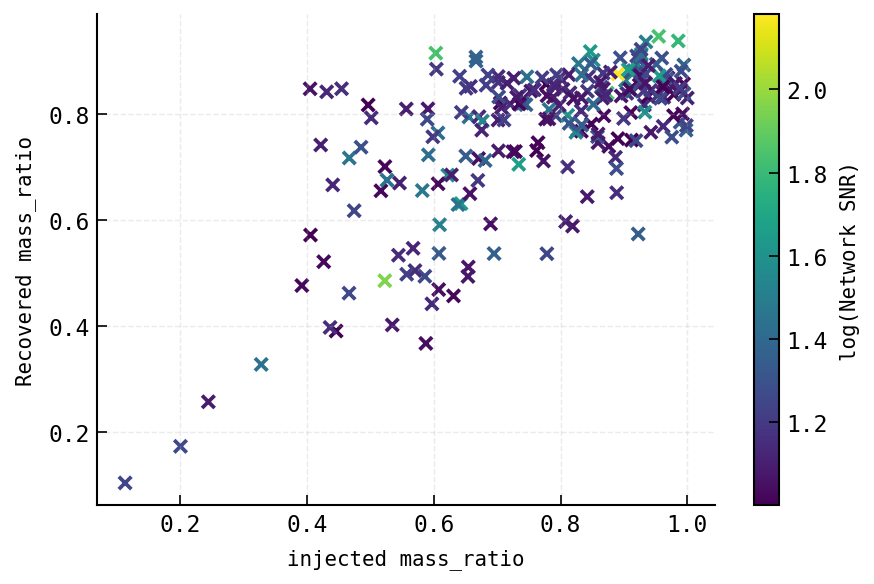

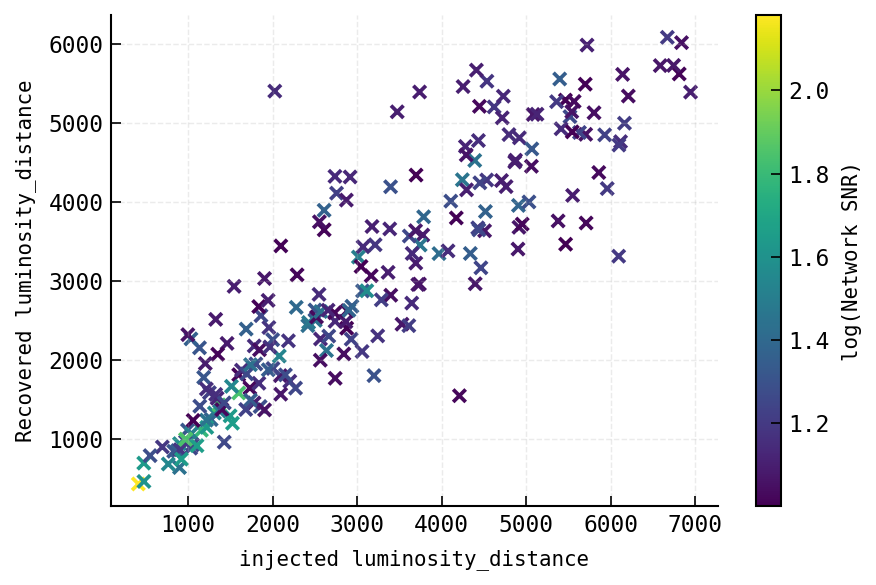

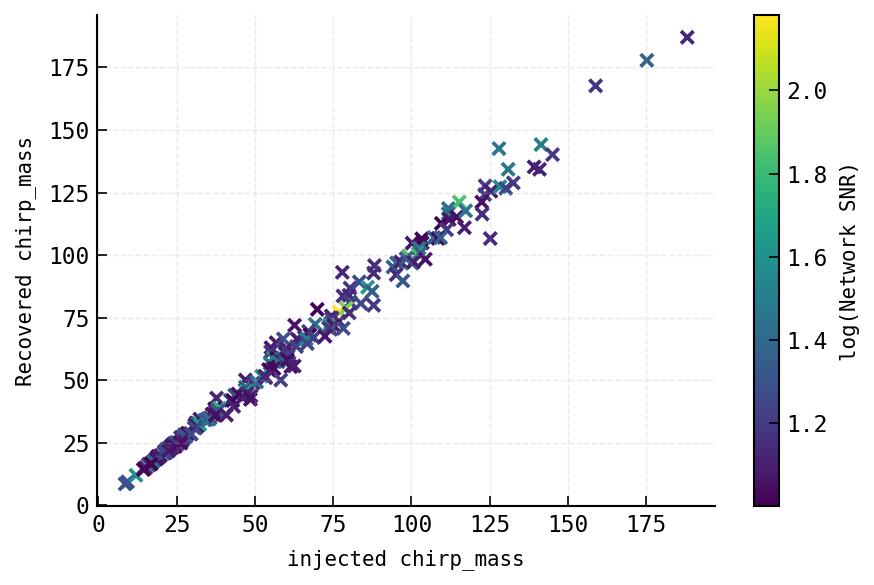

In [60]:
questionable_params = ["mass_ratio","luminosity_distance","chirp_mass"]

for p,upper in zip(questionable_params,[1,7500,250]):
    inj,rec,net_snr,names = [],[],[],[]
    for ev in finalCutCBCs:
        inj.append(ev.injection_parameters[p])
        rec.append(np.median(ev.posterior[p]))
        net_snr.append(np.sqrt(ev.injection_parameters["V1_optimal_snr"]**2 +\
                               ev.injection_parameters["H1_optimal_snr"]**2 +\
                               ev.injection_parameters["L1_optimal_snr"]**2))
        names.append(ev.label)
    plt.scatter(inj,rec,marker='x',c=np.log10(net_snr))
    plt.colorbar(label='log(Network SNR)')
    # plt.plot([0,upper],[0,upper])
    # plt.plot([0,300],[0+150,300+150])
    # plt.plot([0,300],[0-150,300-150])
    # plt.xlim(0,upper)
    # plt.ylim(0,upper)
    plt.xlabel(f"injected {p}")
    plt.ylabel(f"Recovered {p}")
    plt.show()

### `Uniform,rWeight`

In [76]:
myCat = 'Uniform,r'

14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Reading from directory Uniform,r
Reading events from /pscratch/sd/s/seanmacb/proj411ProdRuns/catalogs/Uniform,r
Could not open BBH_300.txt


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_50_sub.out


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,rWeight_precessing_BBH_46


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_150_1.txt


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open BBH_250_1.txt


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_100_sub.out


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_250_1_sub.out


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_secondPass.txt


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_250.txt


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_105_1_sub.out


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_300_1_sub.out


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_50.txt


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open testRun.sh


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,rWeight_precessing_BBH_62


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_100.txt


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_250_2.txt


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_300_2_sub.out


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open allBBHs.txt


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_200_1_sub.out


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open BBH_300_2.txt


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open iniFiles


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_200_1.txt


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_200_2.txt


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open BBH_300_1.txt


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_200_2_sub.out


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open injectionFiles


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_250_2_sub.out


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_150_sub.out


14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:40 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_150.txt
Number of events for Uniform,r: 298


14:40 bilby INFO    : Key: KS-test p-value
14:40 bilby INFO    : mass_ratio: 0.48333664101059204
14:40 bilby INFO    : chirp_mass: 0.03856181957987148
14:40 bilby INFO    : luminosity_distance: 0.3010318304710602
14:40 bilby INFO    : dec: 0.36436996669454635
14:40 bilby INFO    : ra: 0.5928149259368727
14:40 bilby INFO    : chi_1: nan
14:40 bilby INFO    : chi_2: nan
14:40 bilby INFO    : psi: 0.9134924533136012
14:40 bilby INFO    : phase: 0.28715221485033926
14:40 bilby INFO    : theta_jn: 0.2566537925816087
14:40 bilby INFO    : geocent_time: 0.3769844235823774
14:40 bilby INFO    : Combined p-value: nan
14:41 bilby INFO    : Key: KS-test p-value
14:41 bilby INFO    : luminosity_distance: 0.3010318304710602
14:41 bilby INFO    : chirp_mass: 0.03856181957987148
14:41 bilby INFO    : ra: 0.5928149259368727
14:41 bilby INFO    : dec: 0.36436996669454635
14:41 bilby INFO    : mass_ratio: 0.48333664101059204
14:41 bilby INFO    : Combined p-value: 0.20055876164040523


CPU times: user 51.6 s, sys: 3.16 s, total: 54.8 s
Wall time: 54.9 s


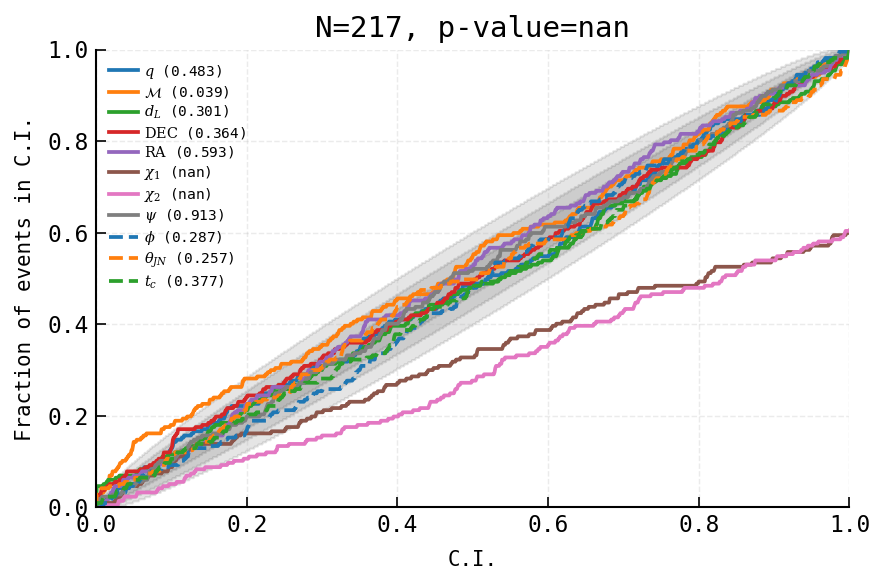

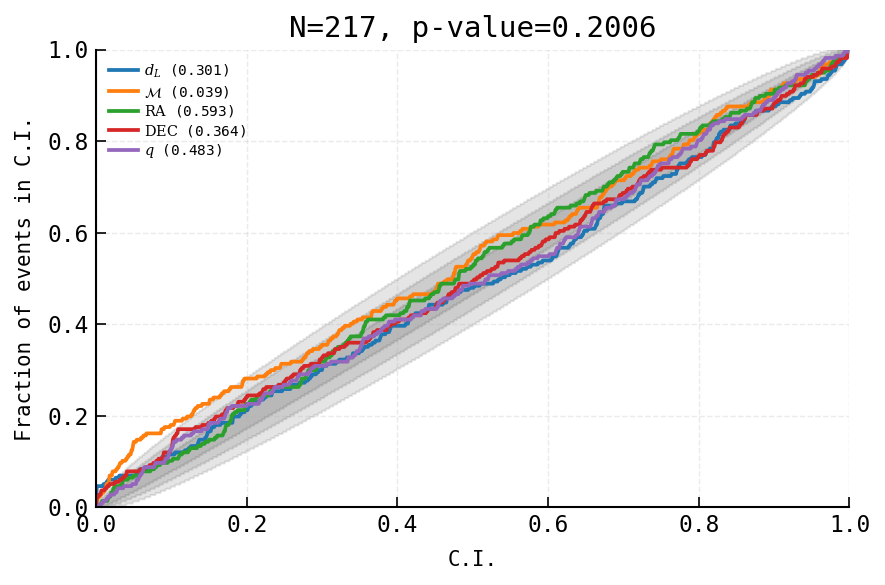

In [77]:
%%time 
for t in [myCat]:
    t_directory = os.path.join(catalogPath,t)
    print(f"Reading from directory {t}")
    allEvents = getEventsFromPath(t_directory)
    print(f"Number of events for {t}: {len(allEvents)}")

    filteredEvents=[]
    for ev in allEvents:
        if np.sqrt(ev.injection_parameters["V1_optimal_snr"]**2 +\
                               ev.injection_parameters["H1_optimal_snr"]**2 +\
                               ev.injection_parameters["L1_optimal_snr"]**2) > 10:
            filteredEvents.append(ev)
            
        
    bilby.core.result.make_pp_plot(filteredEvents, filename=f"./figures/pp_{t}_masked.png",)
    bilby.core.result.make_pp_plot(filteredEvents, filename=f"./figures/pp_{t}_masked_inset.png",keys=["luminosity_distance","chirp_mass","ra","dec","mass_ratio"])

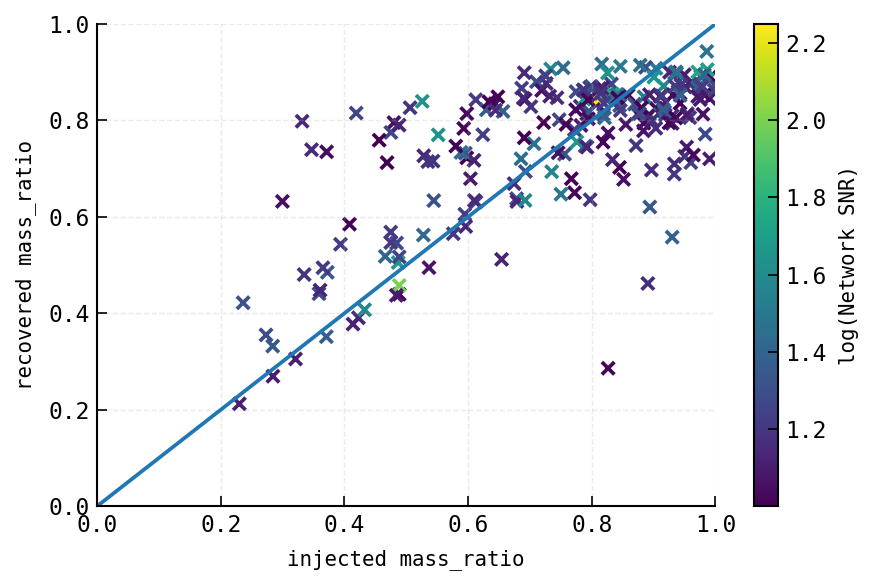

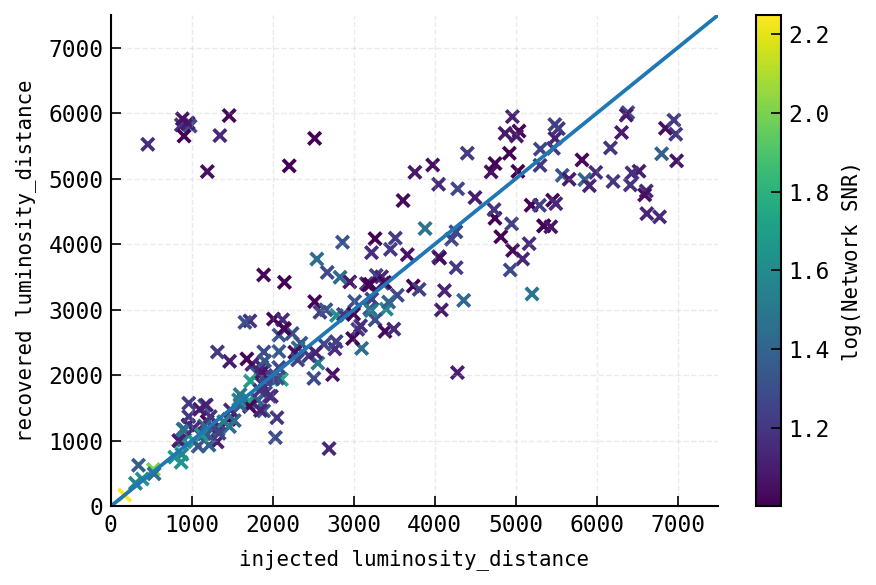

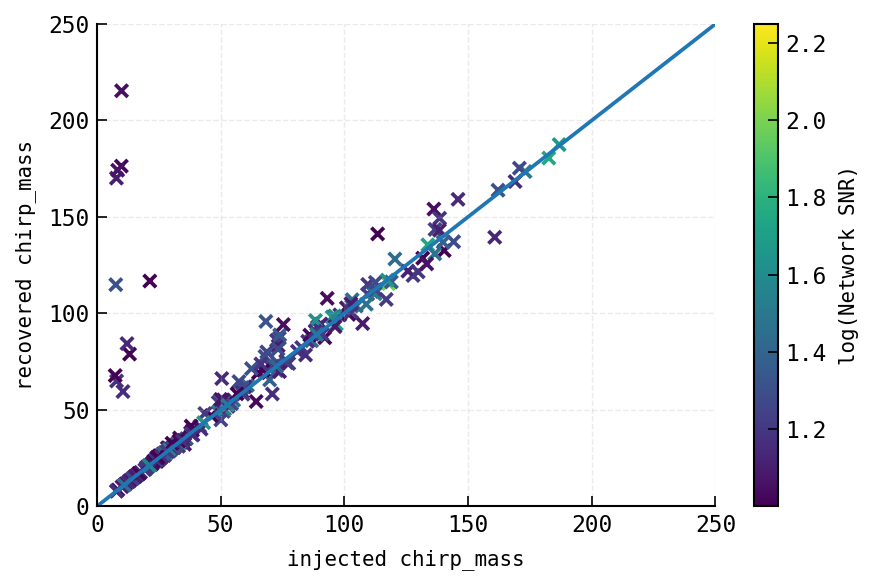

In [78]:
questionable_params = ["mass_ratio","luminosity_distance","chirp_mass"]

for p,upper in zip(questionable_params,[1,7500,250]):
    inj,rec,net_snr,names = [],[],[],[]
    for ev in filteredEvents:
        inj.append(ev.injection_parameters[p])
        rec.append(np.median(ev.posterior[p]))
        net_snr.append(np.sqrt(ev.injection_parameters["V1_optimal_snr"]**2 +\
                               ev.injection_parameters["H1_optimal_snr"]**2 +\
                               ev.injection_parameters["L1_optimal_snr"]**2))
        names.append(ev.label)
    plt.scatter(inj,rec,marker='x',c=np.log10(net_snr))
    plt.colorbar(label='log(Network SNR)')
    plt.plot([0,upper],[0,upper])
    # plt.plot([0,300],[0+150,300+150])
    # plt.plot([0,300],[0-150,300-150])
    plt.xlim(0,upper)
    plt.ylim(0,upper)
    plt.xlabel(f"injected {p}")
    plt.ylabel(f"recovered {p}")
    plt.show()

In [79]:
diffs = np.array(inj)-np.array(rec)
diffs_sorted = np.sort(diffs)
inds = np.argsort(diffs)
finalCutCBCs = []
for diff,snrs,ind in zip(diffs_sorted,net_snr,inds):
    # print(f"{diff/inj[ind]:0.2f}, {snrs:.2f}, {names[ind]}")
    if abs(diff/inj[ind])<2.5:
        finalCutCBCs.append(filteredEvents[ind])
    # print(names[ind])

In [80]:
print(f"Number of CBC's before SNR cut: {len(allEvents)}\n\
Number of CBC's after SNR cut, before convergence cleaning: {len(filteredEvents)}\n\
Number of CBC's after SNR cut and convergence cleaning: {len(finalCutCBCs)}")

Number of CBC's before SNR cut: 298
Number of CBC's after SNR cut, before convergence cleaning: 217
Number of CBC's after SNR cut and convergence cleaning: 206


14:41 bilby INFO    : Key: KS-test p-value
14:41 bilby INFO    : mass_ratio: 0.703078777576775
14:41 bilby INFO    : chirp_mass: 0.667938214471361
14:41 bilby INFO    : luminosity_distance: 0.06755637558781147
14:41 bilby INFO    : dec: 0.40775156647646915
14:41 bilby INFO    : ra: 0.6138411739499031
14:41 bilby INFO    : a_1: 0.20340284103722206
14:41 bilby INFO    : a_2: 0.4837726106137886
14:41 bilby INFO    : psi: 0.7784997817975514
14:41 bilby INFO    : phase: 0.16973468858023877
14:41 bilby INFO    : theta_jn: 0.5564755169594694
14:41 bilby INFO    : phi_12: 2.4246225960507187e-74
14:41 bilby INFO    : phi_jl: 2.9571304651166065e-73
14:41 bilby INFO    : tilt_1: 2.40514620343144e-74
14:41 bilby INFO    : tilt_2: 8.168765397197245e-74
14:41 bilby INFO    : geocent_time: 0.7950953572926465
14:41 bilby INFO    : Combined p-value: 3.720887765160764e-269
14:41 bilby INFO    : Key: KS-test p-value
14:41 bilby INFO    : luminosity_distance: 0.06755637558781147
14:41 bilby INFO    : chir

(<Figure size 900x600 with 1 Axes>,
 pvals(combined_pvalue=np.float64(0.34509276280785534), pvalues=[np.float64(0.06755637558781147), np.float64(0.667938214471361), np.float64(0.6138411739499031), np.float64(0.40775156647646915)], names=['luminosity_distance', 'chirp_mass', 'ra', 'dec']))

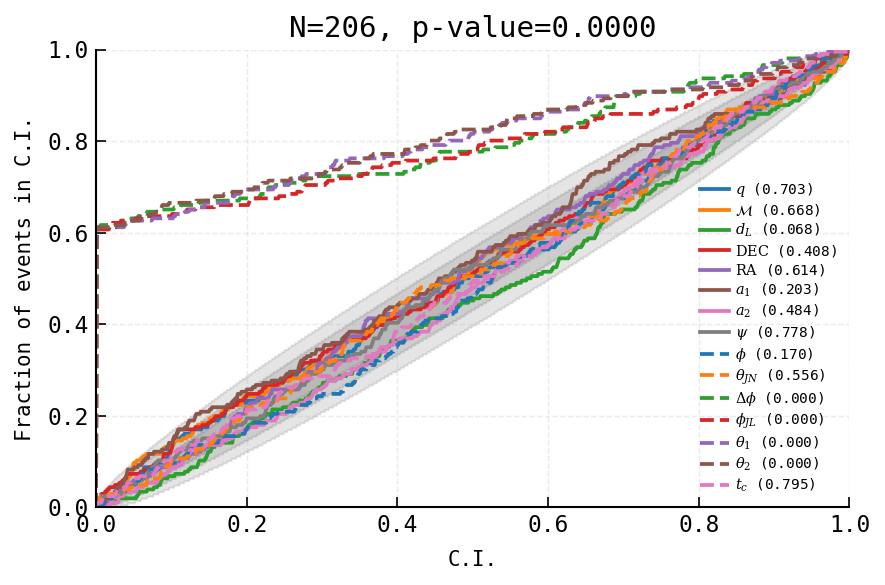

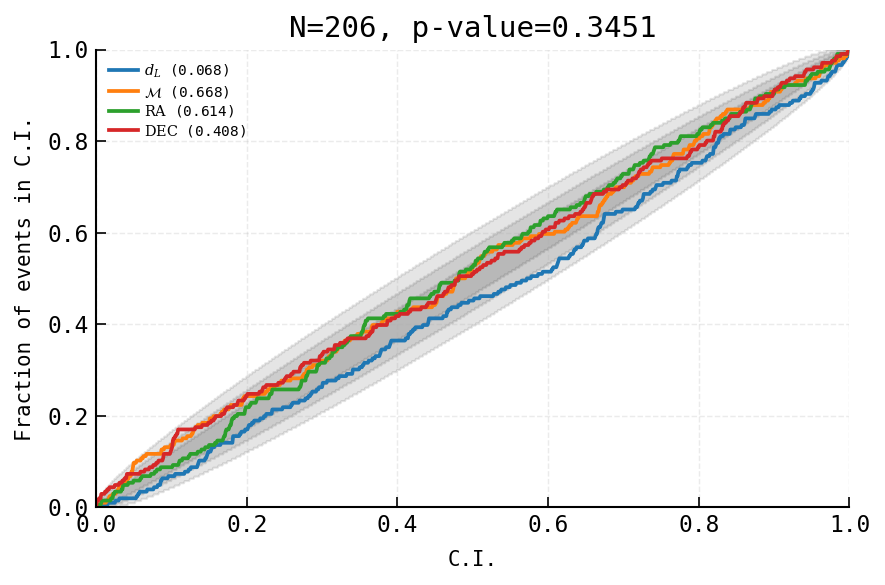

In [81]:
bilby.core.result.make_pp_plot(finalCutCBCs, filename=f"./figures/pp_{t}_finalCut.png",)
bilby.core.result.make_pp_plot(finalCutCBCs, filename=f"./figures/pp_{t}_finalCut_inset.png",keys=["luminosity_distance","chirp_mass","ra","dec"])

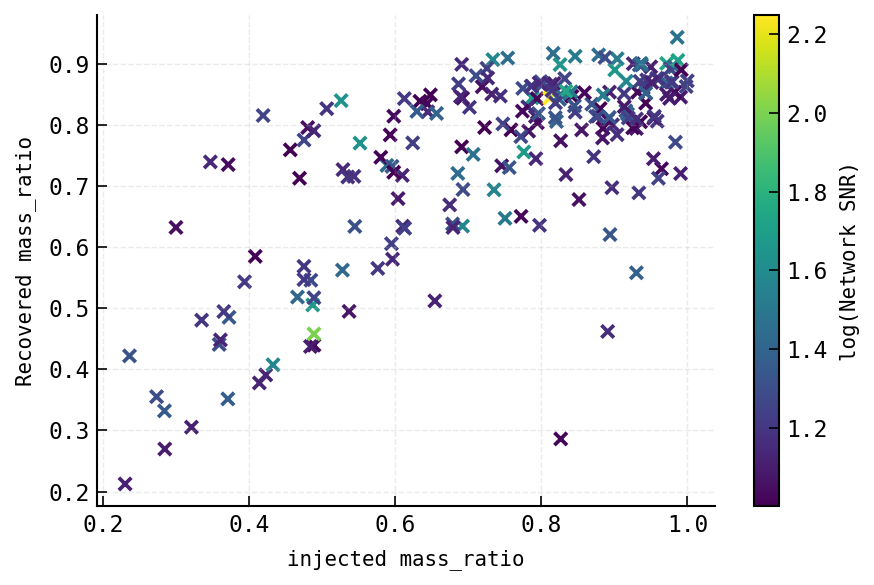

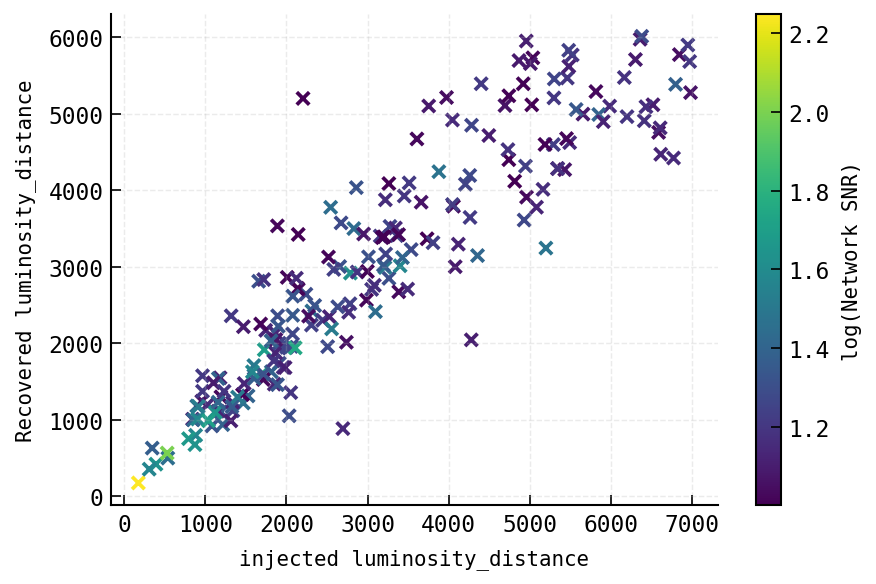

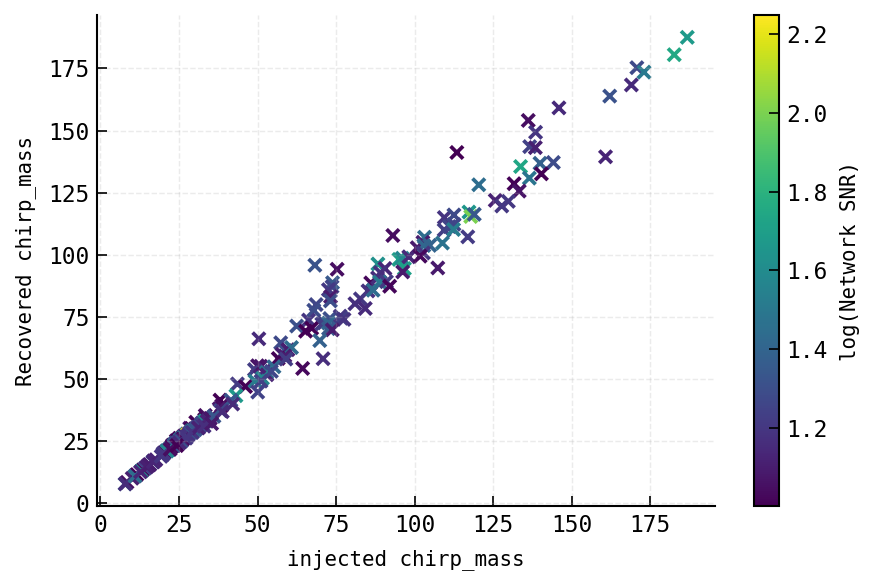

In [67]:
questionable_params = ["mass_ratio","luminosity_distance","chirp_mass"]

for p,upper in zip(questionable_params,[1,7500,250]):
    inj,rec,net_snr,names = [],[],[],[]
    for ev in finalCutCBCs:
        inj.append(ev.injection_parameters[p])
        rec.append(np.median(ev.posterior[p]))
        net_snr.append(np.sqrt(ev.injection_parameters["V1_optimal_snr"]**2 +\
                               ev.injection_parameters["H1_optimal_snr"]**2 +\
                               ev.injection_parameters["L1_optimal_snr"]**2))
        names.append(ev.label)
    plt.scatter(inj,rec,marker='x',c=np.log10(net_snr))
    plt.colorbar(label='log(Network SNR)')
    # plt.plot([0,upper],[0,upper])
    # plt.plot([0,300],[0+150,300+150])
    # plt.plot([0,300],[0-150,300-150])
    # plt.xlim(0,upper)
    # plt.ylim(0,upper)
    plt.xlabel(f"injected {p}")
    plt.ylabel(f"Recovered {p}")
    plt.show()

### `Uniform,yWeight`

In [68]:
myCat = 'Uniform,y'

14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Reading from directory Uniform,y
Reading events from /pscratch/sd/s/seanmacb/proj411ProdRuns/catalogs/Uniform,y


14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:33 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_275_inis.txt


14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:33 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_150_inis.txt


14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:33 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open testRun.sh
Could not open BBH_75_inis.txt


14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:33 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open allBBH_inis.txt


14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:33 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:33 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_75_sub.out


14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open iniFiles


14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_225_inis.txt
Could not open BBH_275_sub.out


14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,yWeight_precessing_BBH_43


14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_300_inis.txt


14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_300_0_sub.out


14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open injectionFiles


14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_225_sub.out


14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_150_sub.out


14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
14:34 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open BBH_300_0_inis.txt
Number of events for Uniform,y: 299


14:34 bilby INFO    : Key: KS-test p-value
14:34 bilby INFO    : mass_ratio: 0.4928963646061003
14:34 bilby INFO    : chirp_mass: 0.46174534290880676
14:34 bilby INFO    : luminosity_distance: 0.2902326899781461
14:34 bilby INFO    : dec: 0.6761041582938487
14:34 bilby INFO    : ra: 0.9432923393756321
14:34 bilby INFO    : chi_1: nan
14:34 bilby INFO    : chi_2: nan
14:34 bilby INFO    : psi: 0.28417288015509956
14:34 bilby INFO    : phase: 0.9712088342070272
14:34 bilby INFO    : theta_jn: 0.42650241857508076
14:34 bilby INFO    : geocent_time: 0.024292675818363363
14:34 bilby INFO    : Combined p-value: nan
14:34 bilby INFO    : Key: KS-test p-value
14:34 bilby INFO    : luminosity_distance: 0.2902326899781461
14:34 bilby INFO    : chirp_mass: 0.46174534290880676
14:34 bilby INFO    : ra: 0.9432923393756321
14:34 bilby INFO    : dec: 0.6761041582938487
14:34 bilby INFO    : mass_ratio: 0.4928963646061003
14:34 bilby INFO    : Combined p-value: 0.7864548168212995


CPU times: user 51.7 s, sys: 12 s, total: 1min 3s
Wall time: 1min 5s


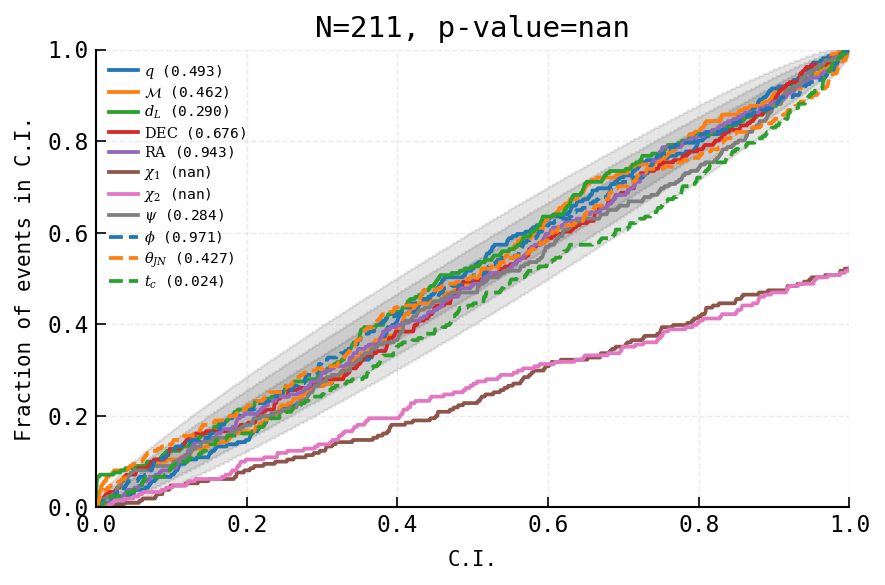

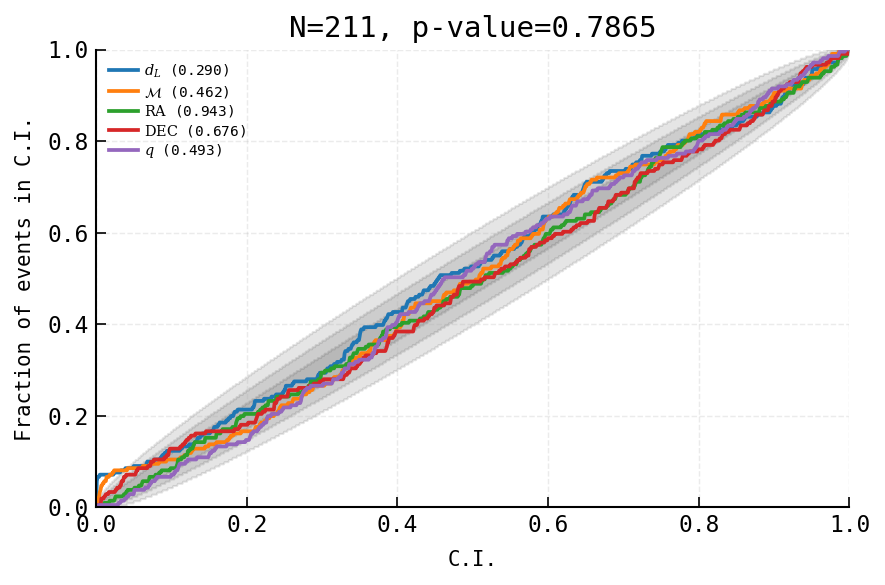

In [69]:
%%time 
for t in [myCat]:
    t_directory = os.path.join(catalogPath,t)
    print(f"Reading from directory {t}")
    allEvents = getEventsFromPath(t_directory)
    print(f"Number of events for {t}: {len(allEvents)}")

    filteredEvents=[]
    for ev in allEvents:
        if np.sqrt(ev.injection_parameters["V1_optimal_snr"]**2 +\
                               ev.injection_parameters["H1_optimal_snr"]**2 +\
                               ev.injection_parameters["L1_optimal_snr"]**2) > 10:
            filteredEvents.append(ev)
            
        
    bilby.core.result.make_pp_plot(filteredEvents, filename=f"./figures/pp_{t}_masked.png",)
    bilby.core.result.make_pp_plot(filteredEvents, filename=f"./figures/pp_{t}_masked_inset.png",keys=["luminosity_distance","chirp_mass","ra","dec","mass_ratio"])

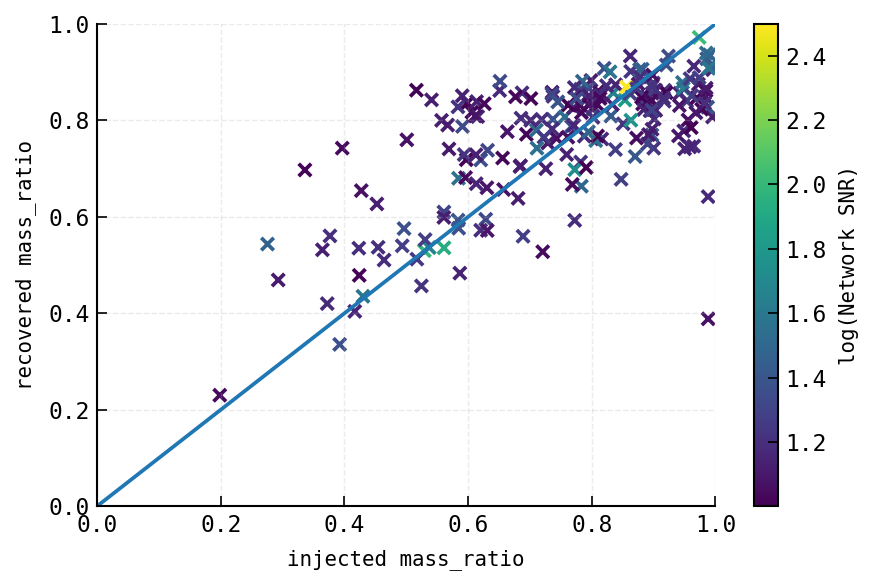

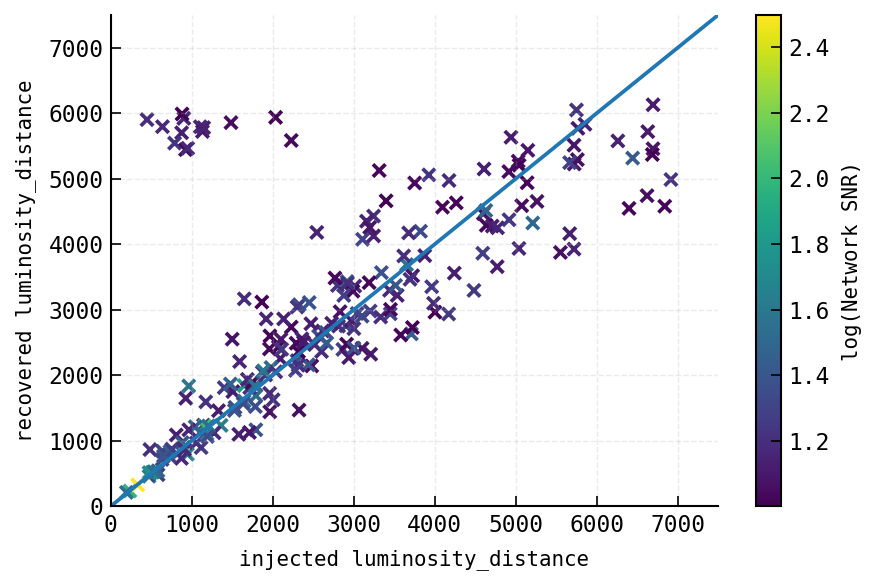

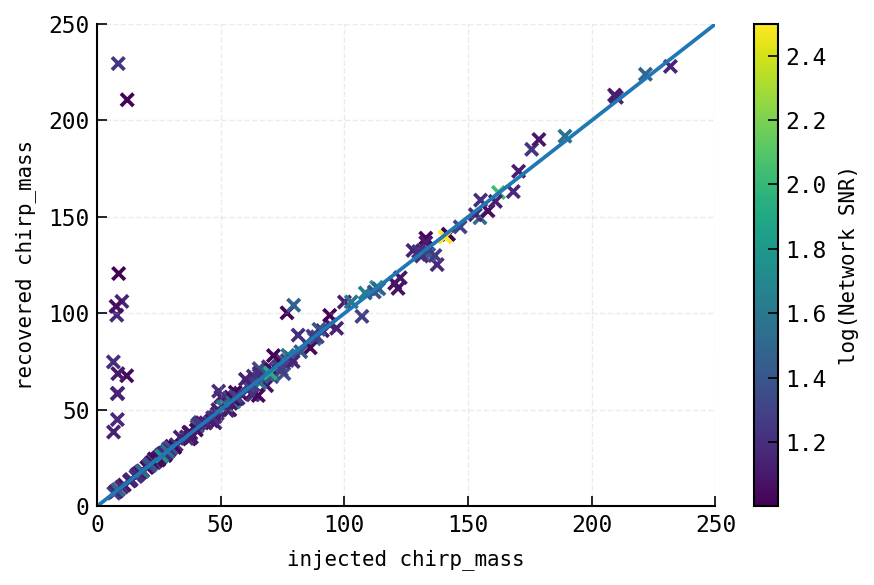

In [70]:
questionable_params = ["mass_ratio","luminosity_distance","chirp_mass"]

for p,upper in zip(questionable_params,[1,7500,250]):
    inj,rec,net_snr,names = [],[],[],[]
    for ev in filteredEvents:
        inj.append(ev.injection_parameters[p])
        rec.append(np.median(ev.posterior[p]))
        net_snr.append(np.sqrt(ev.injection_parameters["V1_optimal_snr"]**2 +\
                               ev.injection_parameters["H1_optimal_snr"]**2 +\
                               ev.injection_parameters["L1_optimal_snr"]**2))
        names.append(ev.label)
    plt.scatter(inj,rec,marker='x',c=np.log10(net_snr))
    plt.colorbar(label='log(Network SNR)')
    plt.plot([0,upper],[0,upper])
    # plt.plot([0,300],[0+150,300+150])
    # plt.plot([0,300],[0-150,300-150])
    plt.xlim(0,upper)
    plt.ylim(0,upper)
    plt.xlabel(f"injected {p}")
    plt.ylabel(f"recovered {p}")
    plt.show()

In [71]:
diffs = np.array(inj)-np.array(rec)
diffs_sorted = np.sort(diffs)
inds = np.argsort(diffs)
finalCutCBCs = []
for diff,snrs,ind in zip(diffs_sorted,net_snr,inds):
    # print(f"{diff/inj[ind]:0.2f}, {snrs:.2f}, {names[ind]}")
    if abs(diff/inj[ind])<2.5:
        finalCutCBCs.append(filteredEvents[ind])
    # print(names[ind])

In [72]:
print(f"Number of CBC's before SNR cut: {len(allEvents)}\n\
Number of CBC's after SNR cut, before convergence cleaning: {len(filteredEvents)}\n\
Number of CBC's after SNR cut and convergence cleaning: {len(finalCutCBCs)}")

Number of CBC's before SNR cut: 299
Number of CBC's after SNR cut, before convergence cleaning: 211
Number of CBC's after SNR cut and convergence cleaning: 198


14:39 bilby INFO    : Key: KS-test p-value
14:39 bilby INFO    : mass_ratio: 0.5156007821999579
14:39 bilby INFO    : chirp_mass: 0.03837397180711355
14:39 bilby INFO    : luminosity_distance: 0.44214511695062253
14:39 bilby INFO    : dec: 0.5503722668758234
14:39 bilby INFO    : ra: 0.9801003261432414
14:39 bilby INFO    : chi_1: nan
14:39 bilby INFO    : chi_2: nan
14:39 bilby INFO    : psi: 0.4389734157716917
14:39 bilby INFO    : phase: 0.8402056680599833
14:39 bilby INFO    : theta_jn: 0.8880077308858982
14:39 bilby INFO    : geocent_time: 0.0760704160399458
14:39 bilby INFO    : Combined p-value: nan
14:39 bilby INFO    : Key: KS-test p-value
14:39 bilby INFO    : luminosity_distance: 0.44214511695062253
14:39 bilby INFO    : chirp_mass: 0.03837397180711355
14:39 bilby INFO    : ra: 0.9801003261432414
14:39 bilby INFO    : dec: 0.5503722668758234
14:39 bilby INFO    : Combined p-value: 0.3106677441600387


(<Figure size 900x600 with 1 Axes>,
 pvals(combined_pvalue=np.float64(0.3106677441600387), pvalues=[np.float64(0.44214511695062253), np.float64(0.03837397180711355), np.float64(0.9801003261432414), np.float64(0.5503722668758234)], names=['luminosity_distance', 'chirp_mass', 'ra', 'dec']))

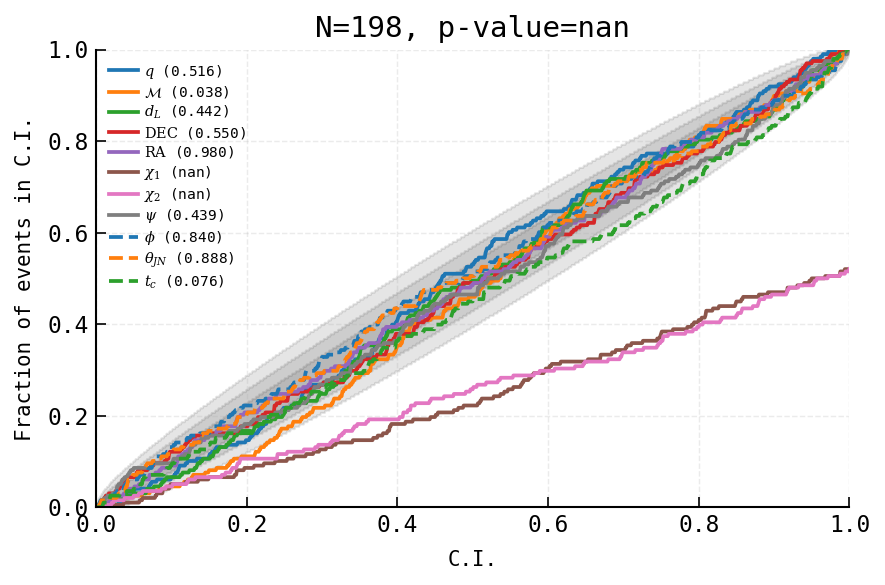

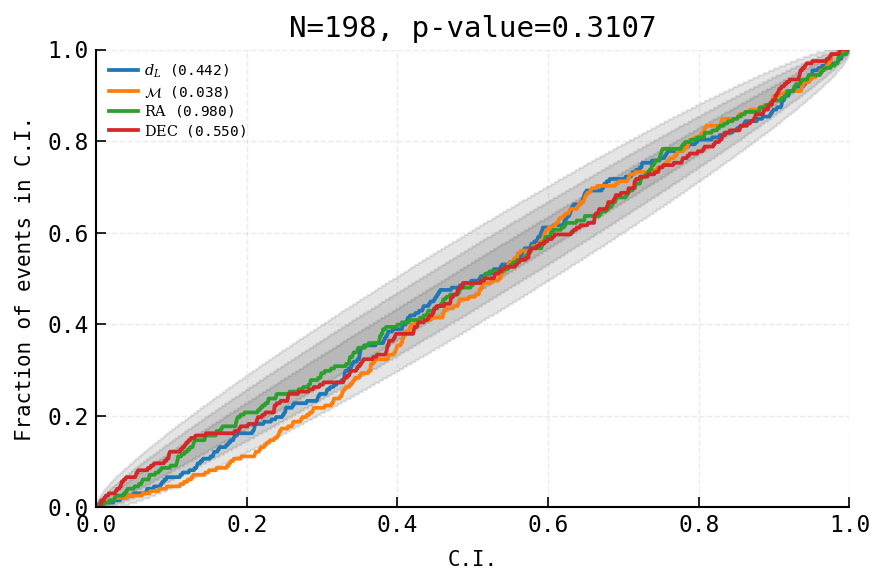

In [75]:
bilby.core.result.make_pp_plot(finalCutCBCs, filename=f"./figures/pp_{t}_finalCut.png",)
bilby.core.result.make_pp_plot(finalCutCBCs, filename=f"./figures/pp_{t}_finalCut_inset.png",keys=["luminosity_distance","chirp_mass","ra","dec"])

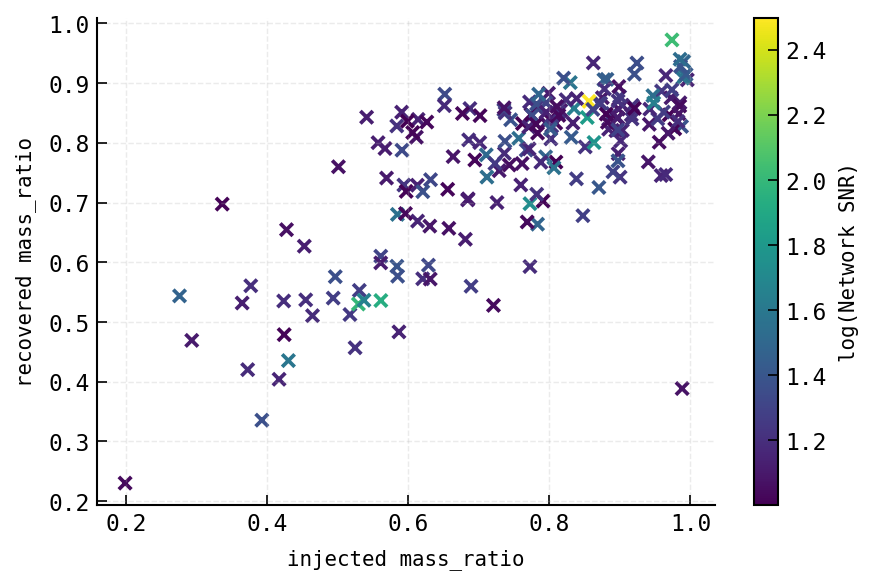

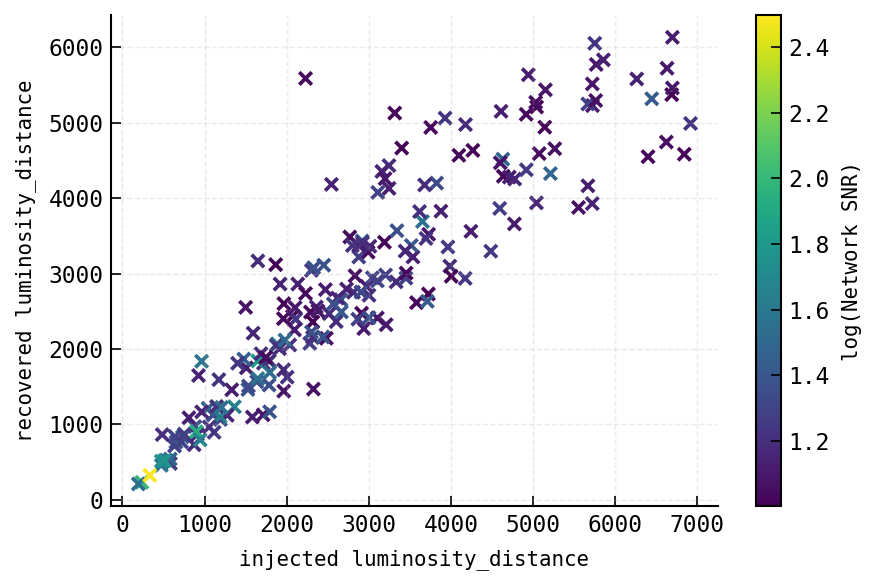

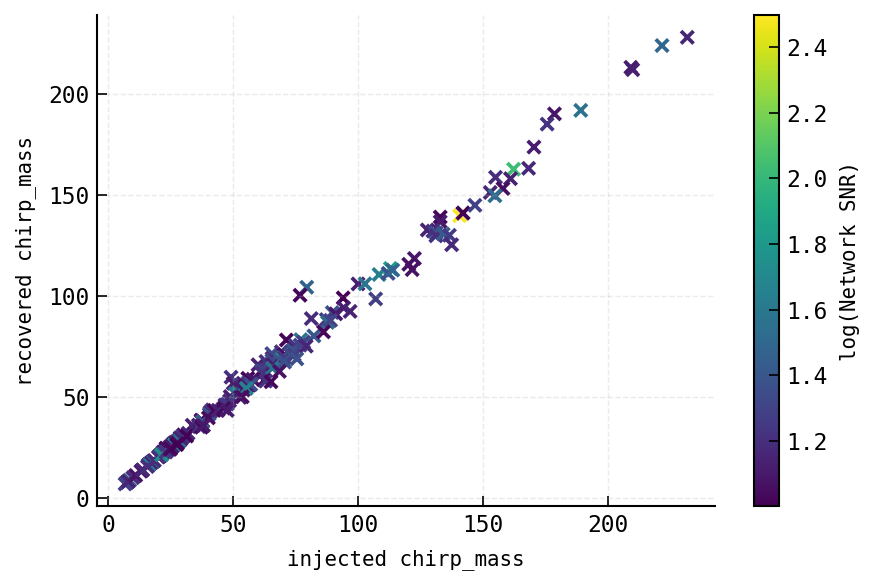

In [74]:
questionable_params = ["mass_ratio","luminosity_distance","chirp_mass"]

for p,upper in zip(questionable_params,[1,7500,250]):
    inj,rec,net_snr,names = [],[],[],[]
    for ev in finalCutCBCs:
        inj.append(ev.injection_parameters[p])
        rec.append(np.median(ev.posterior[p]))
        net_snr.append(np.sqrt(ev.injection_parameters["V1_optimal_snr"]**2 +\
                               ev.injection_parameters["H1_optimal_snr"]**2 +\
                               ev.injection_parameters["L1_optimal_snr"]**2))
        names.append(ev.label)
    plt.scatter(inj,rec,marker='x',c=np.log10(net_snr))
    plt.colorbar(label='log(Network SNR)')
    # plt.plot([0,upper],[0,upper])
    # plt.plot([0,300],[0+150,300+150])
    # plt.plot([0,300],[0-150,300-150])
    # plt.xlim(0,upper)
    # plt.ylim(0,upper)
    plt.xlabel(f"injected {p}")
    plt.ylabel(f"recovered {p}")
    plt.show()